<a href="https://colab.research.google.com/github/AnnJungChan/youngjin_TECH/blob/main/DATA_PLOT/time_series_with_error_split_by_good_or_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 로딩

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 데이터 로딩

## RAW DATA 로딩

In [2]:
no1_pro1=pd.read_csv("/content/gdrive/MyDrive/용접데이터/1호기_프로세스1.csv")
no1_pro2=pd.read_csv("/content/gdrive/MyDrive/용접데이터/1호기_프로세스2.csv")
no2_pro2=pd.read_csv("/content/gdrive/MyDrive/용접데이터/2호기_프로세스2.csv")
no2_pro3=pd.read_csv("/content/gdrive/MyDrive/용접데이터/2호기_프로세스3.csv")
no2_pro11=pd.read_csv("/content/gdrive/MyDrive/용접데이터/2호기_프로세스11.csv")
no1_pro1=no1_pro1.drop(columns = ["Unnamed: 0"])
no1_pro2=no1_pro2.drop(columns = ["Unnamed: 0"])
no2_pro2=no2_pro2.drop(columns = ["Unnamed: 0"])
no2_pro3=no2_pro3.drop(columns = ["Unnamed: 0"])
no2_pro11=no2_pro11.drop(columns = ["Unnamed: 0"])

machine = ['no1_pro1','no1_pro2','no2_pro2','no2_pro3','no2_pro11']
machine_data = [no1_pro1,no1_pro2,no2_pro2,no2_pro3,no2_pro11]

for i in range(len(machine)) : 
  machine_data[i]['date_time']=machine_data[i]["date"] + " " + machine_data[i]['time']
  machine_data[i]['date_time'] = machine_data[i]['date_time'].astype('datetime64')

## GOOD 데이터와 BAD 데이터 분할

In [3]:
machine = ['no1_pro1','no1_pro2','no2_pro2','no2_pro3','no2_pro11']
machine_data = [no1_pro1,no1_pro2,no2_pro2,no2_pro3,no2_pro11]
for i in range(len(machine)) :
  globals()[f'{machine[i]}' + "_" + "good"] = machine_data[i].loc[machine_data[i]['decision']== 'GOOD']
  globals()[f'{machine[i]}' + "_" + "bad"] = machine_data[i].loc[machine_data[i]['decision']!= 'GOOD']

## 각각의 데이터에서 생산하는 생산 품목

In [4]:
machine_decision = ['no1_pro1_good','no1_pro1_bad','no1_pro2_good','no1_pro2_bad','no2_pro2_good','no2_pro2_bad','no2_pro3_good','no2_pro3_bad','no2_pro11_good','no2_pro11_bad']
machine_decision_data = [no1_pro1_good,no1_pro1_bad,no1_pro2_good,no1_pro2_bad,no2_pro2_good,no2_pro2_bad,no2_pro3_good,no2_pro3_bad,no2_pro11_good,no2_pro11_bad]
for i in range(len(machine_decision)) : 
  print(f'{machine_decision[i]}' + " : "+  machine_decision_data[i]['model_name'].unique() )

['no1_pro1_good : MEVERICK (RWD/FWD)']
['no1_pro1_bad : MEVERICK (RWD/FWD)']
['no1_pro2_good : MEVERICK (RWD/FWD)']
['no1_pro2_bad : MEVERICK (RWD/FWD)']
['no2_pro2_good : GAMMA T-GDI']
['no2_pro2_bad : GAMMA T-GDI']
['no2_pro3_good : MEVERICK A']
['no2_pro3_bad : MEVERICK A']
['no2_pro11_good : GAMMA T-GDI']
['no2_pro11_bad : GAMMA T-GDI']


# 플랏팅 함수

## 플랏팅 함수

In [5]:
def plot_sensor(temp_df,var_name) :
  fig = plt.figure(figsize = (30,10))
  ax = plt.subplot(111)

  labels = temp_df['decision'].values.tolist()
  dates = temp_df['date_time'].index

  temp_df[var_name].plot(ax=ax)
  ax.legend([var_name], loc = 'upper right')

  temp_start = dates[0] #인덱스 0번에서부터 시작
  temp_date = dates[0] # dates 0번에서 시작
  temp_label = labels[0] # 라벌 또한 0번에서 시작

  for xc, value in zip(dates, labels):
            if temp_label != value:
                if temp_label == "NG_(T)(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='cyan')
                if temp_label == "NG_(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='black')
                if temp_label == 'NG_(A)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='magenta')
                if temp_label == 'NG_(A)(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='red')
                if temp_label == 'NG_(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='yellow')
                if temp_label == 'NG_(A)(T)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='green')
                if temp_label == 'NG_(V)(T)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='orange')
                temp_start=xc
                temp_label=value
            temp_date = xc

## 플랏팅에 사용할 데이터들

In [6]:
var_list = ['supply','A','V','gas','sec']
machine_decision_good = ['no1_pro1_good','no1_pro2_good','no2_pro2_good','no2_pro3_good','no2_pro11_good']
machine_decision_bad = ['no1_pro1_bad','no1_pro2_bad','no2_pro2_bad','no2_pro3_bad','no2_pro11_bad']
machine_decision_data_good = [no1_pro1_good,no1_pro2_good,no2_pro2_good,no2_pro3_good,no2_pro11_good]
machine_decision_data_bad = [no1_pro1_bad,no1_pro2_bad,no2_pro2_bad,no2_pro3_bad,no2_pro11_bad]

# 1호기 프로세스 1

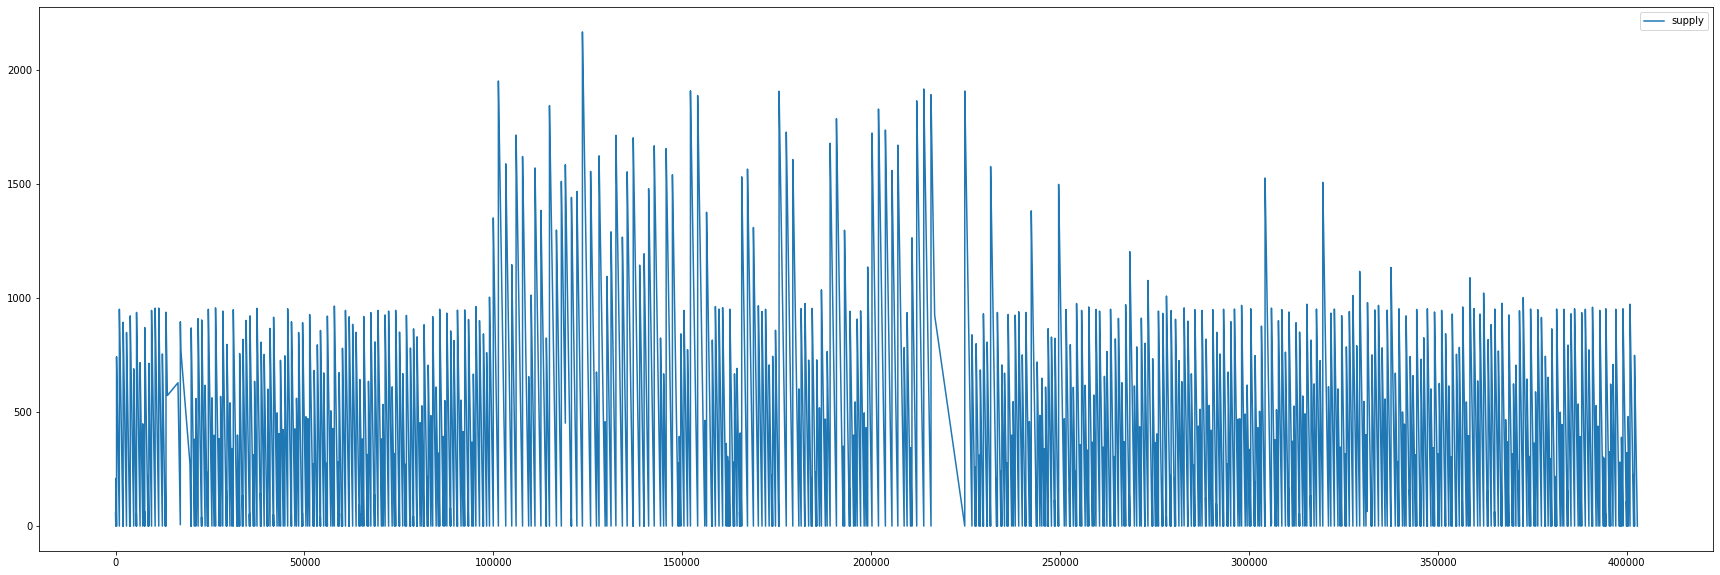

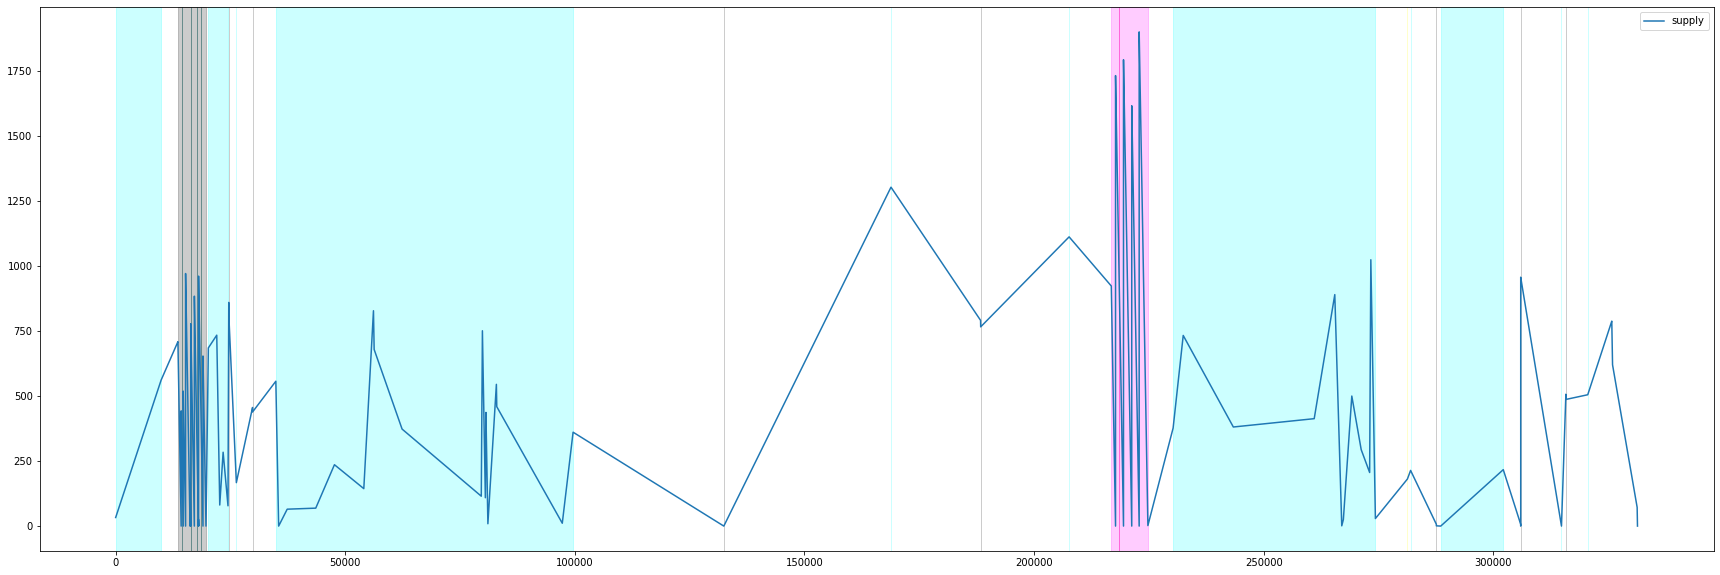

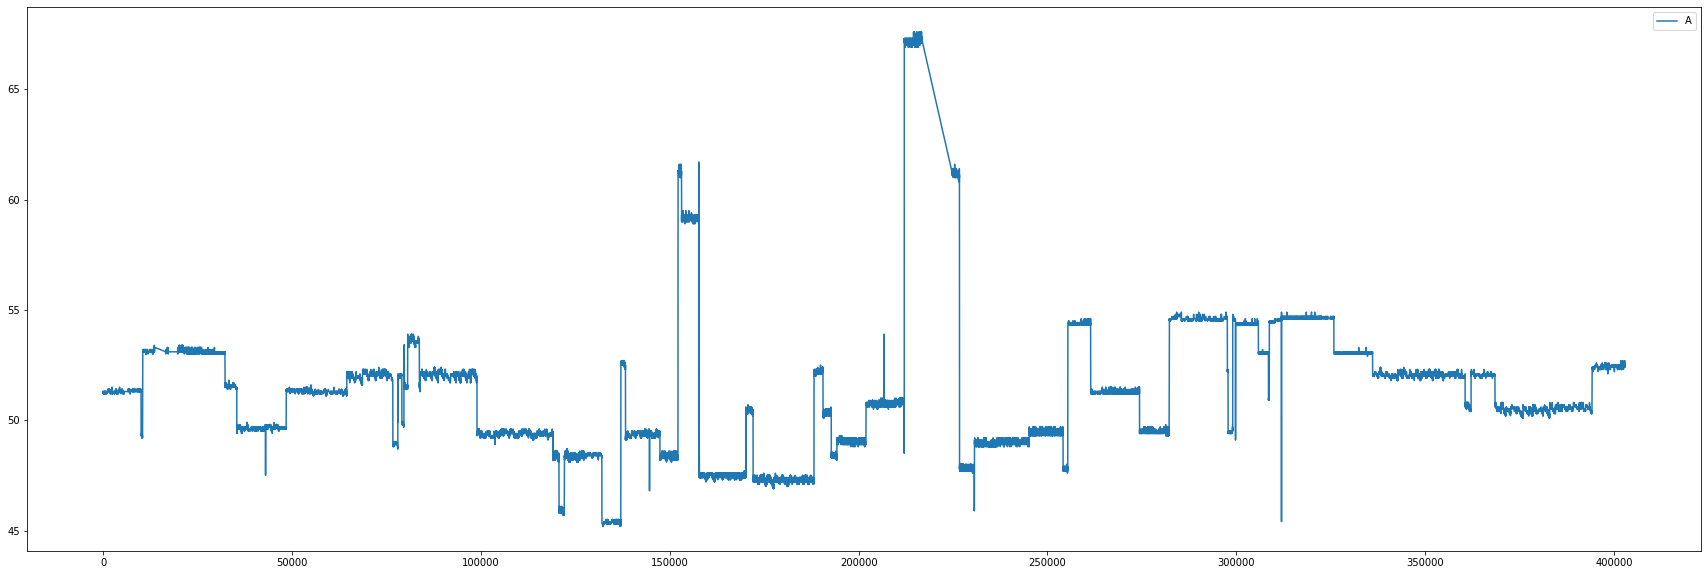

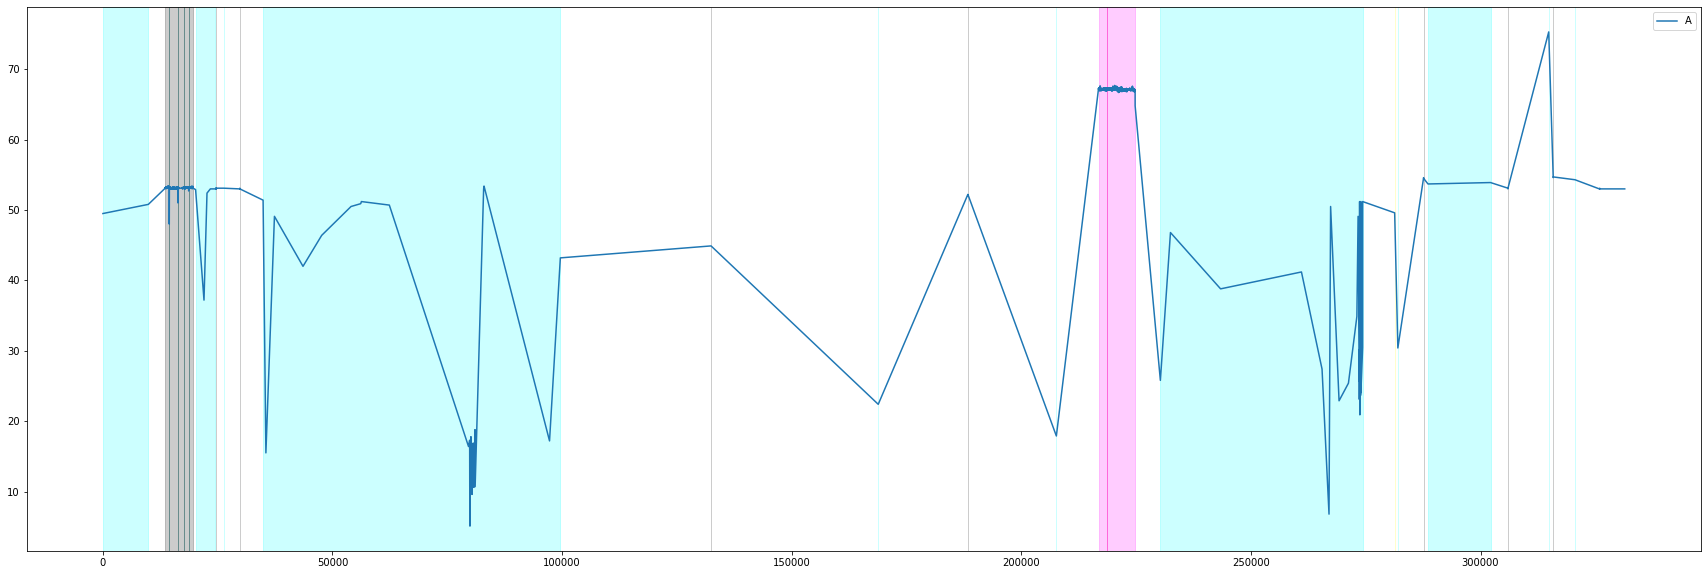

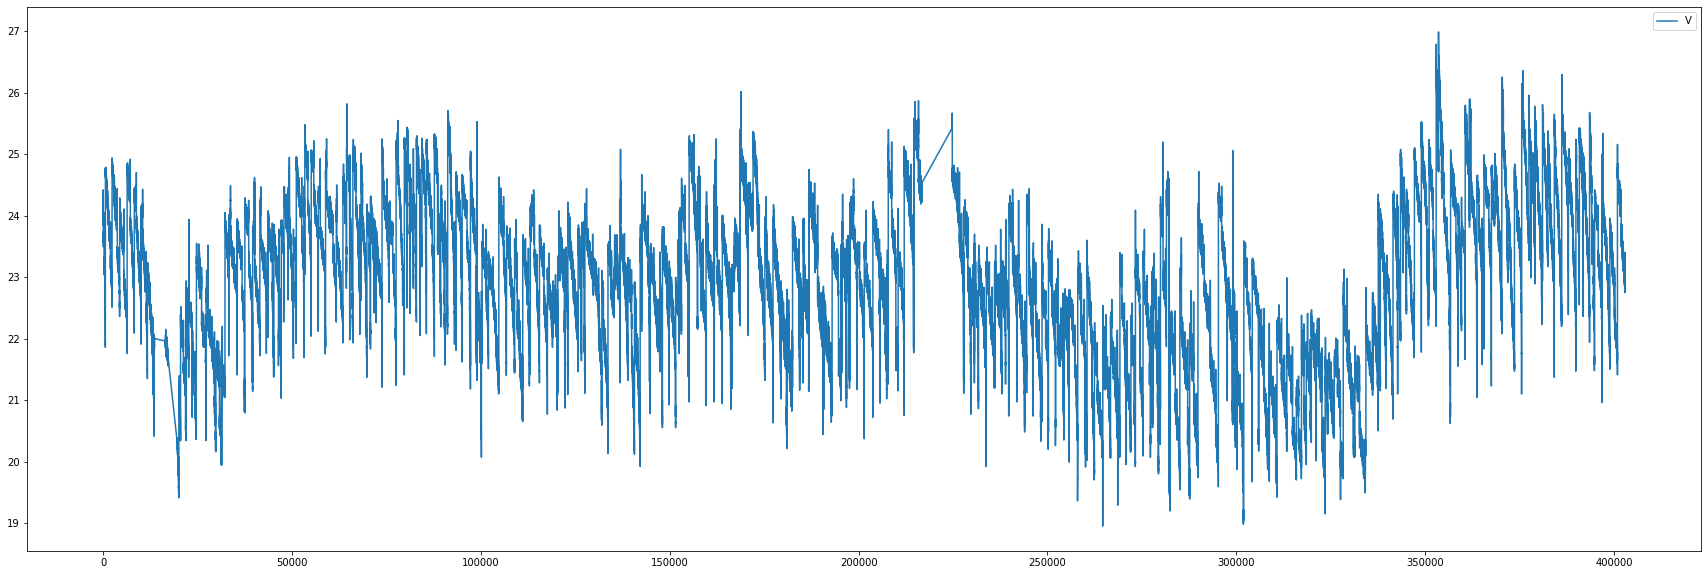

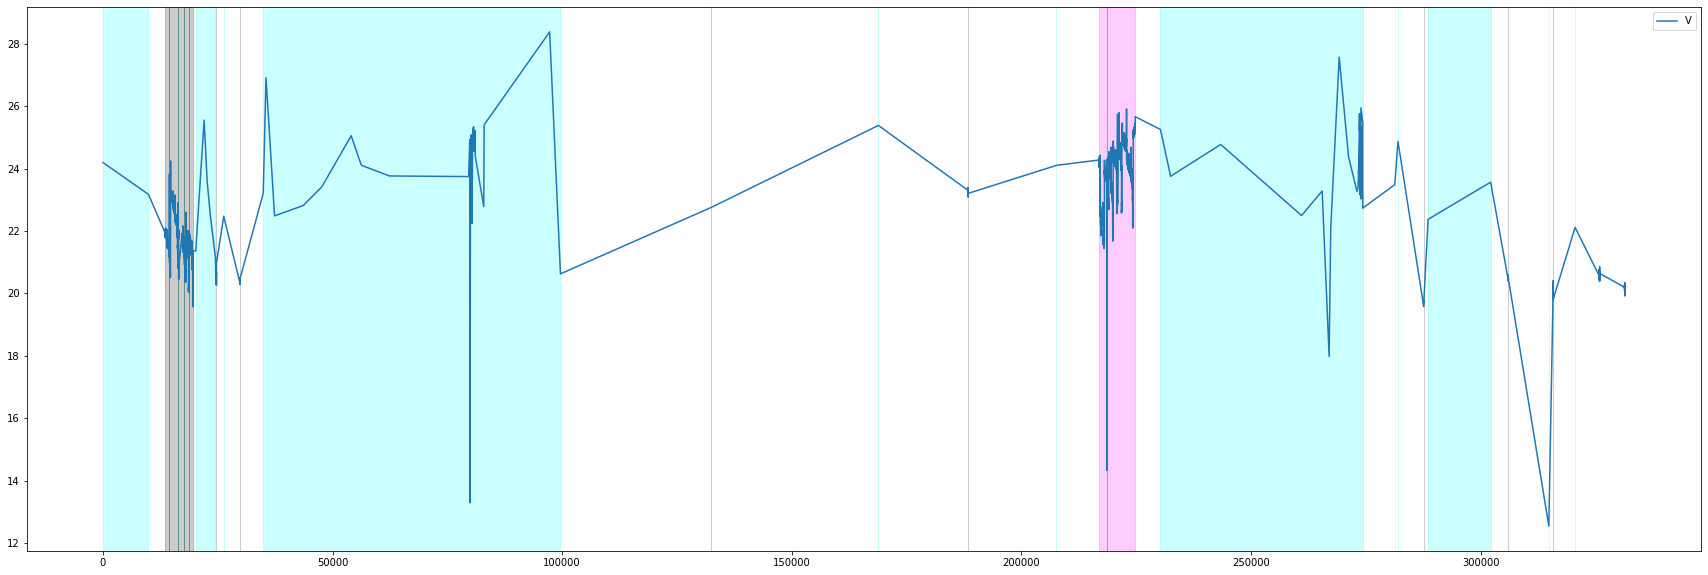

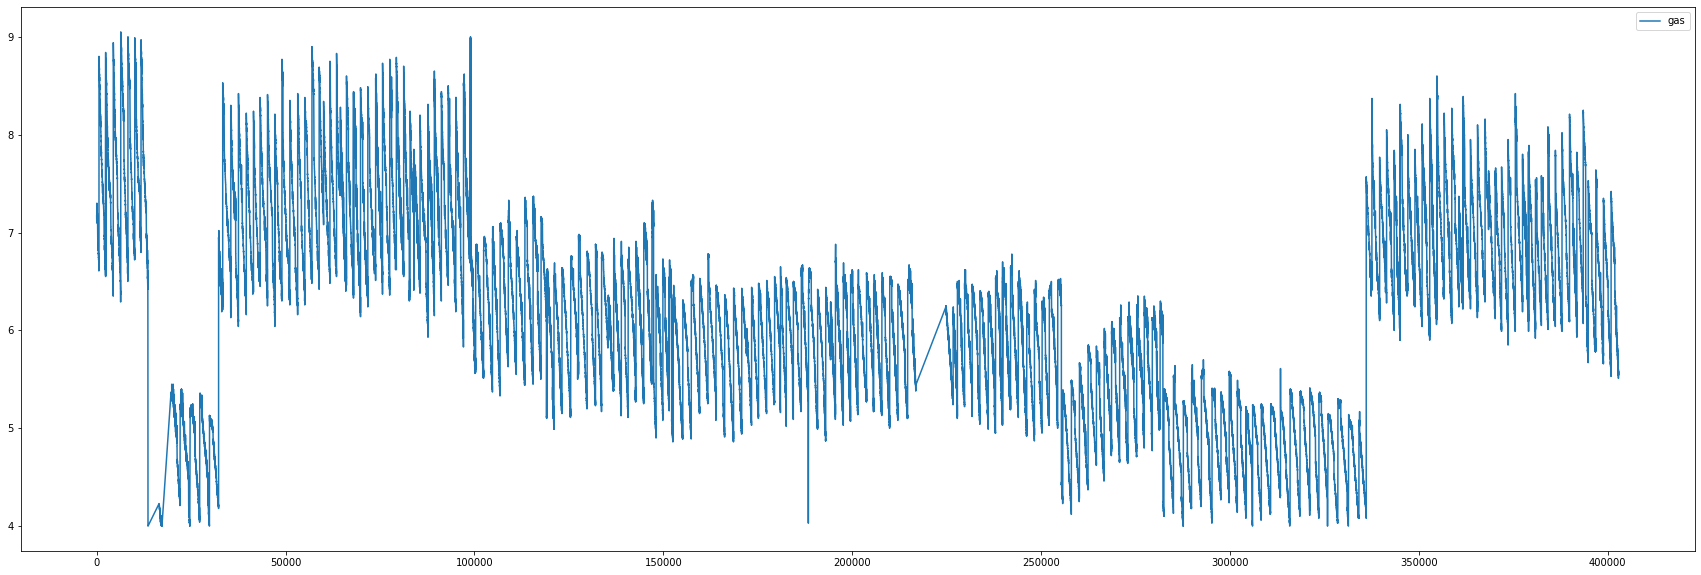

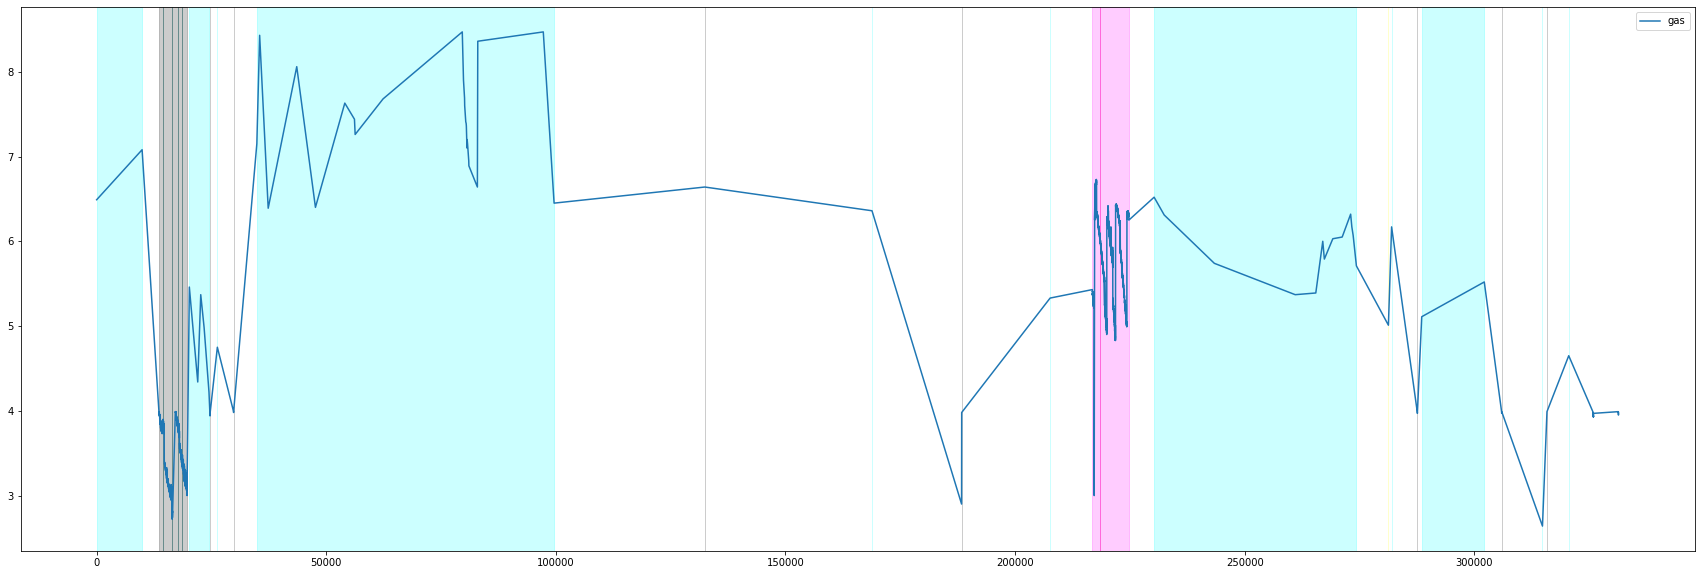

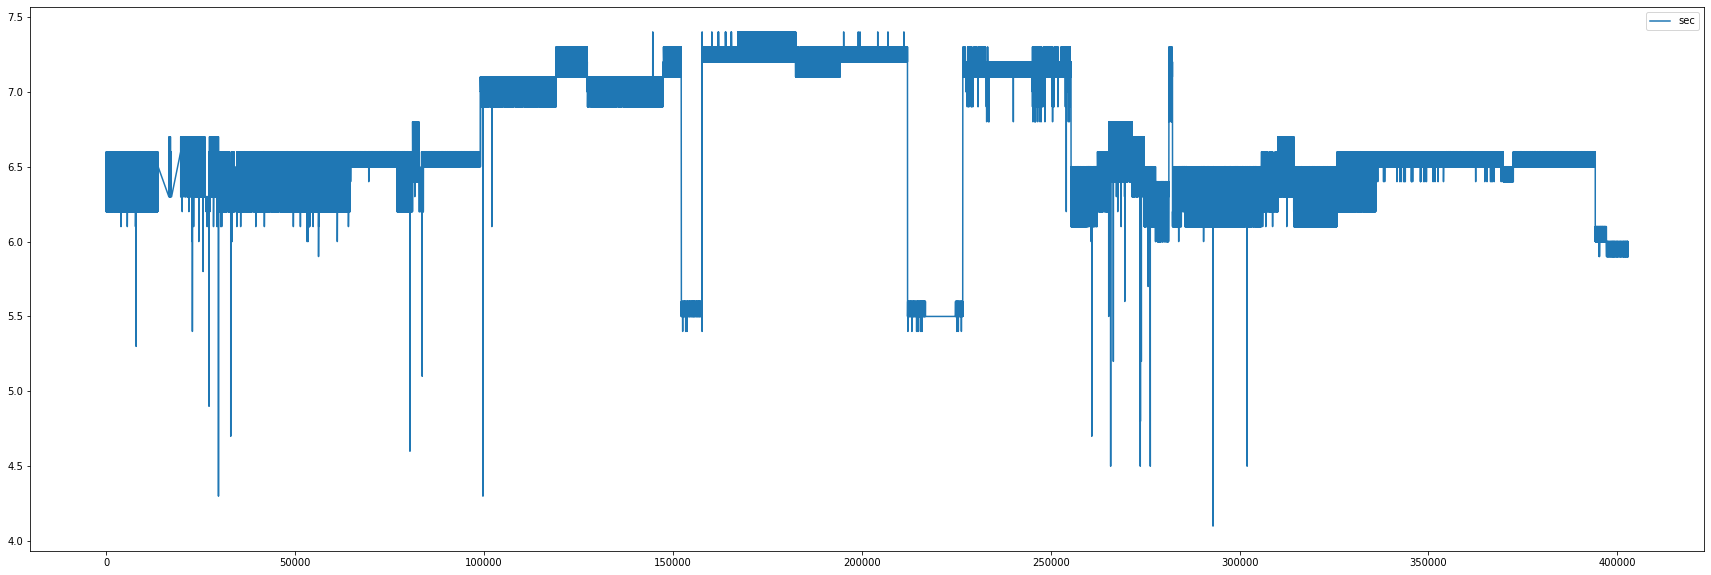

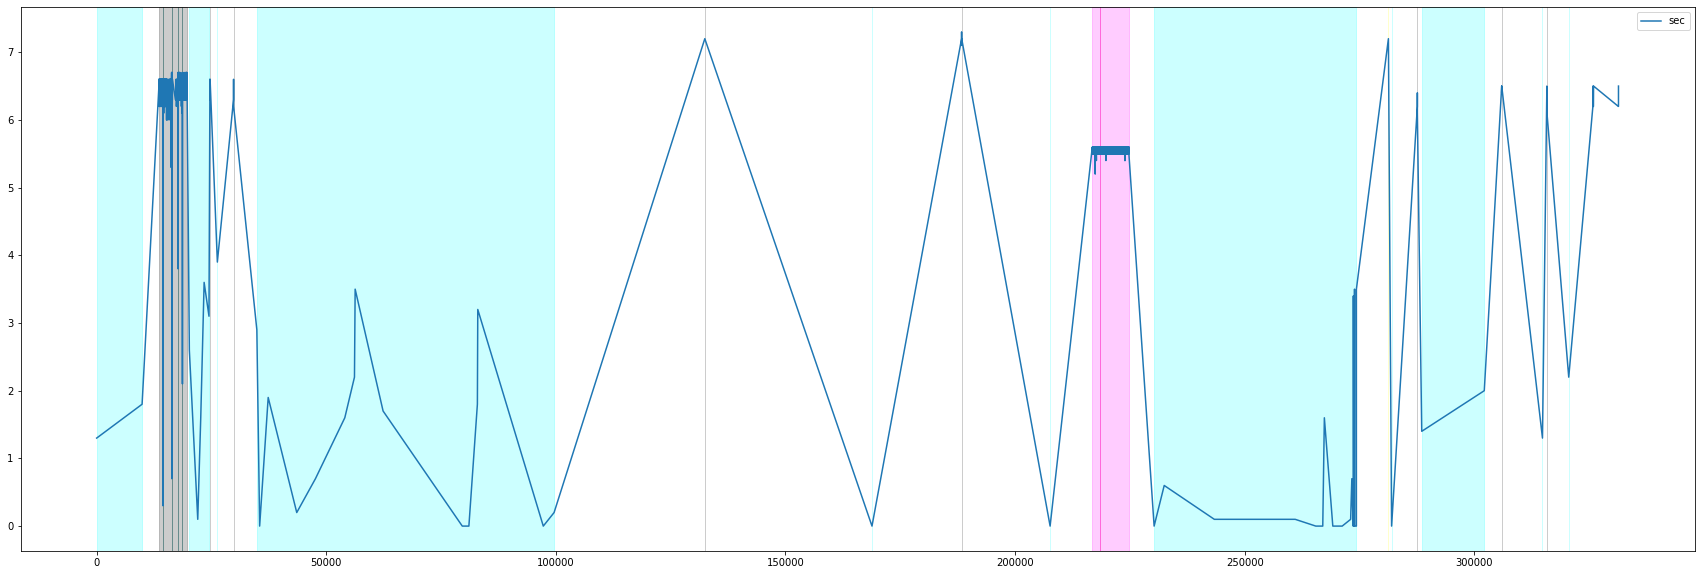

In [7]:
for j in range(len(var_list)) :
  plot_sensor(machine_decision_data_good[0],f'{var_list[j]}')
  plot_sensor(machine_decision_data_bad[0],f'{var_list[j]}')

# 1호기 프로세스 2

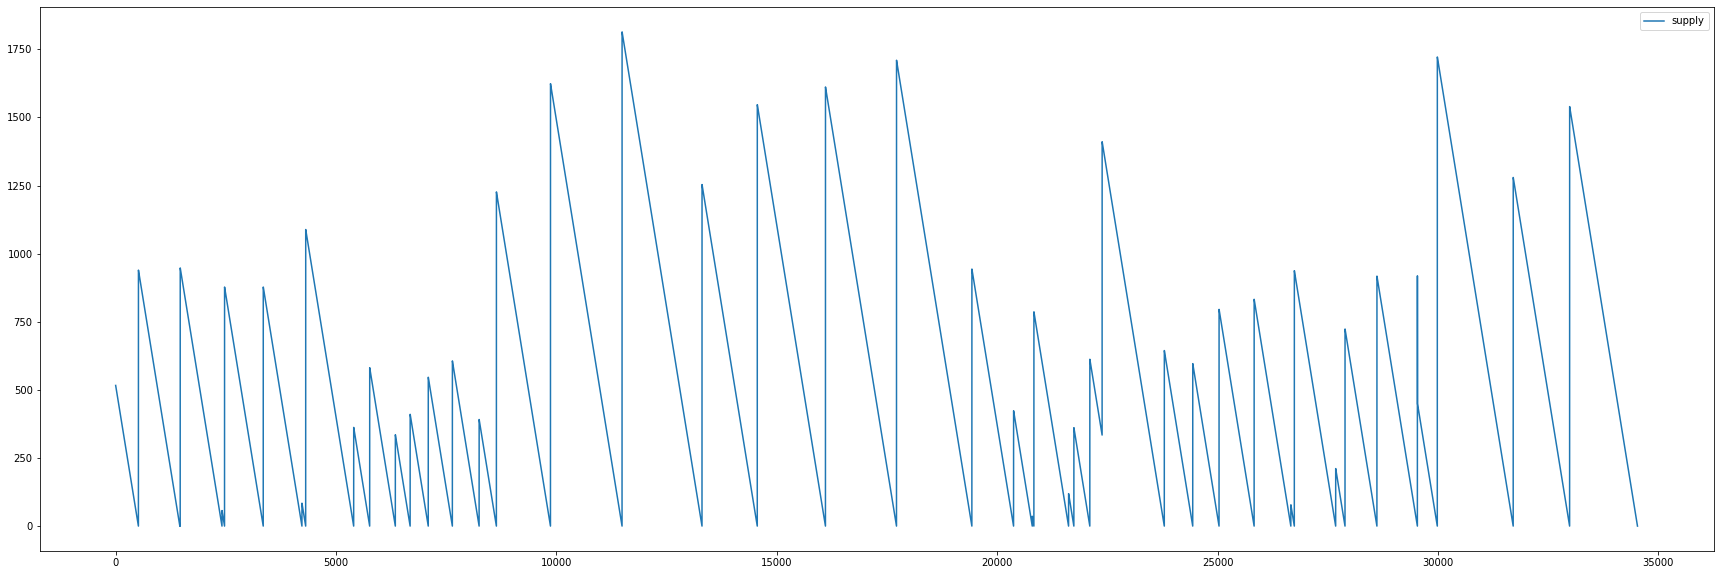

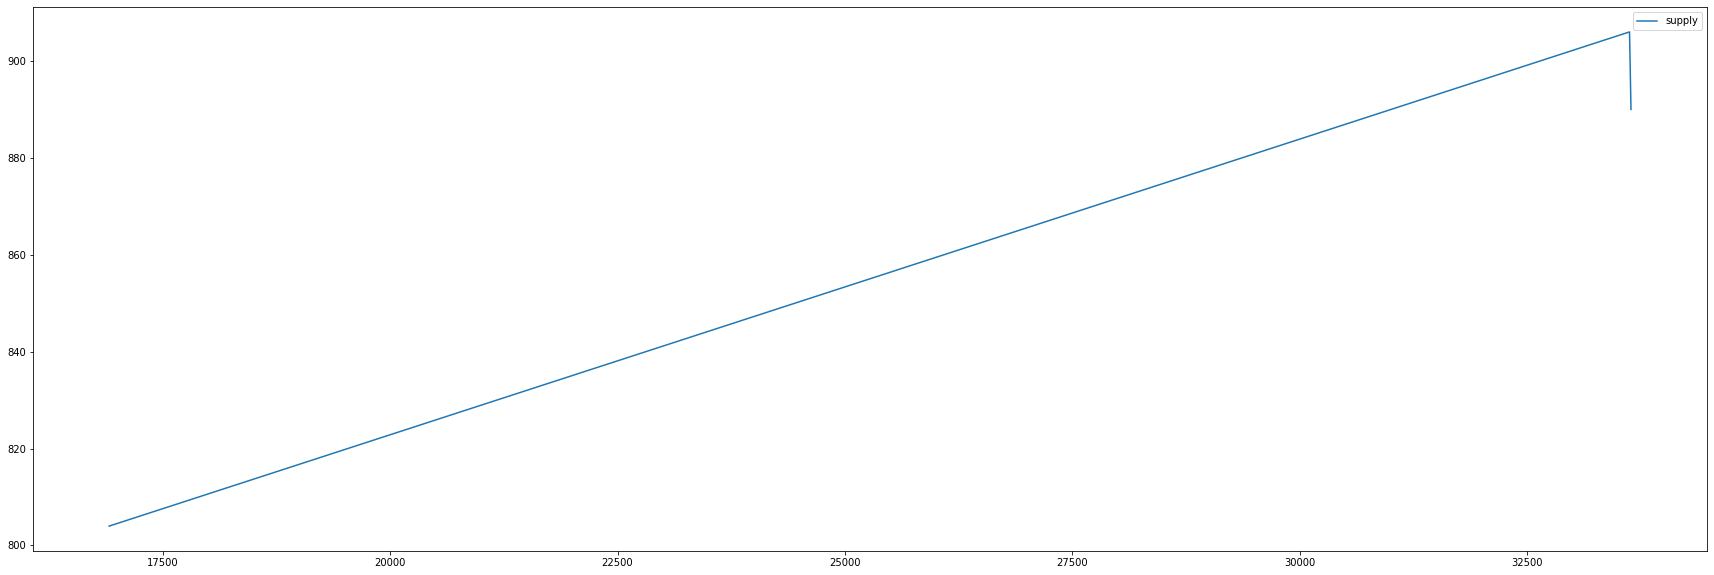

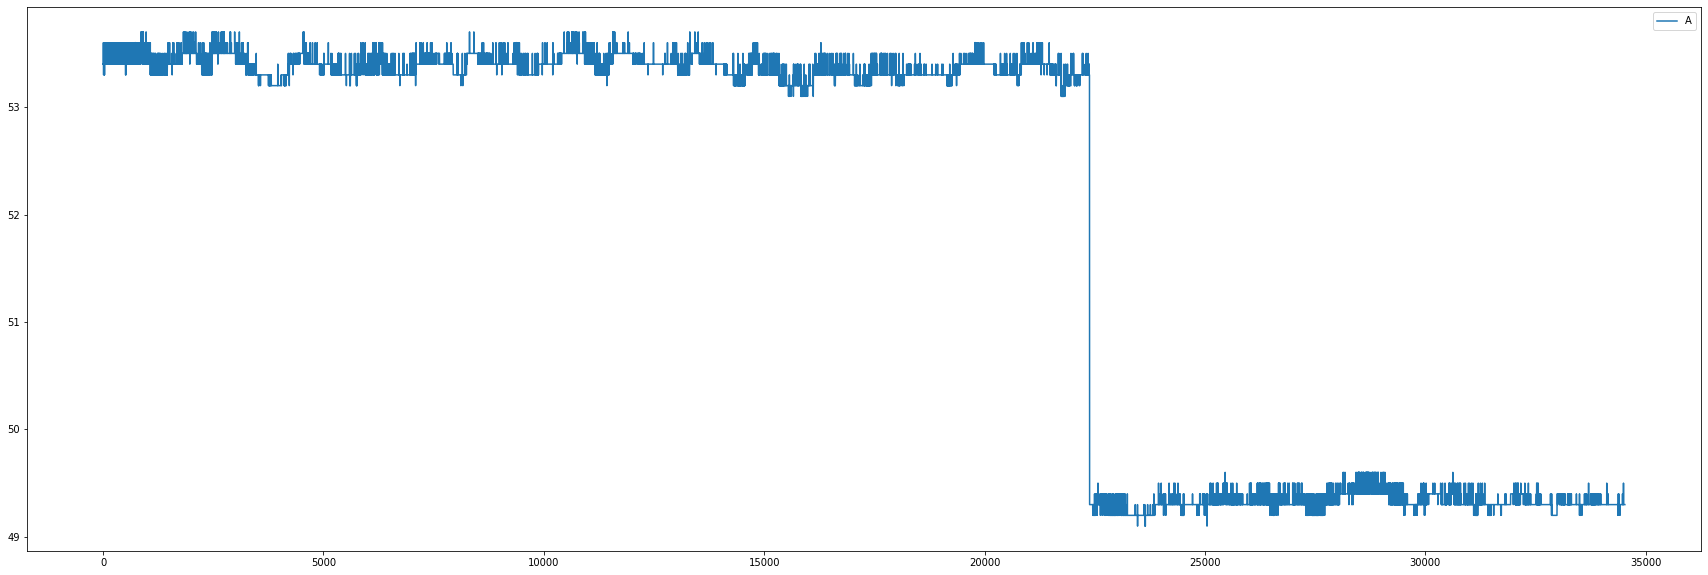

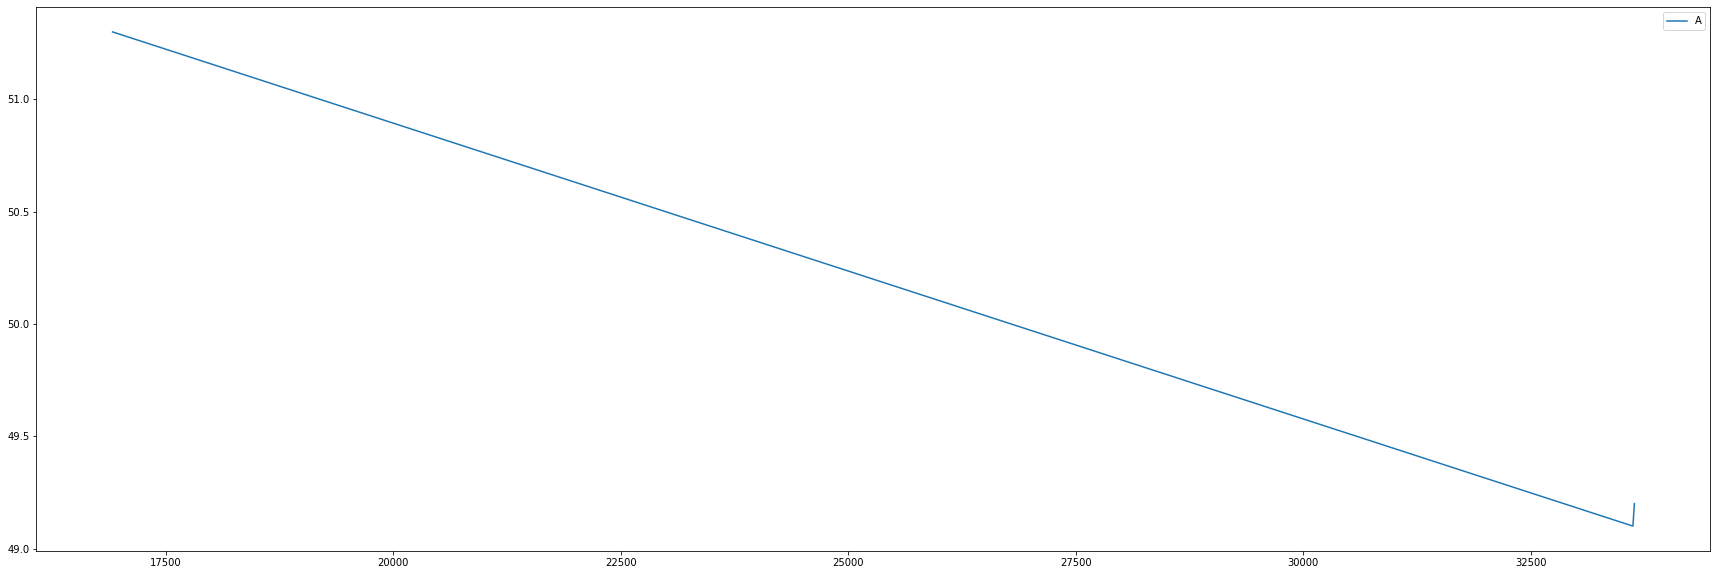

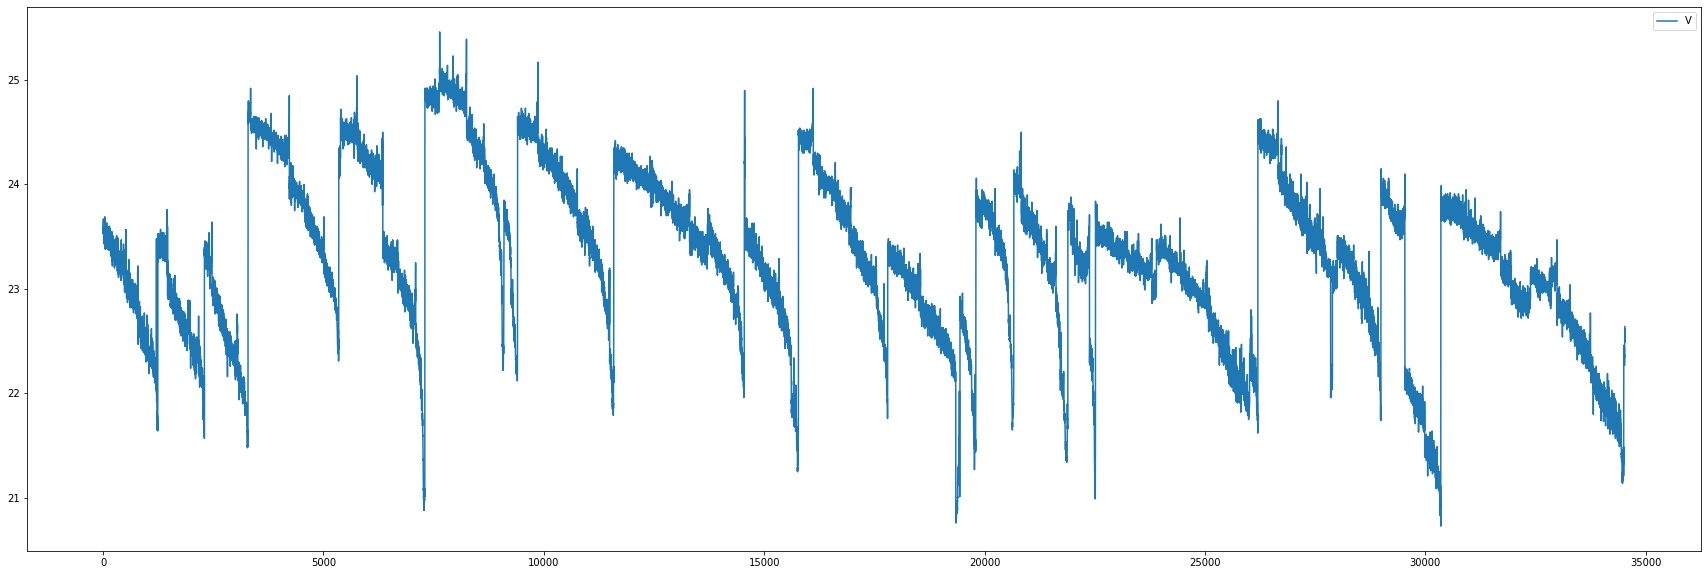

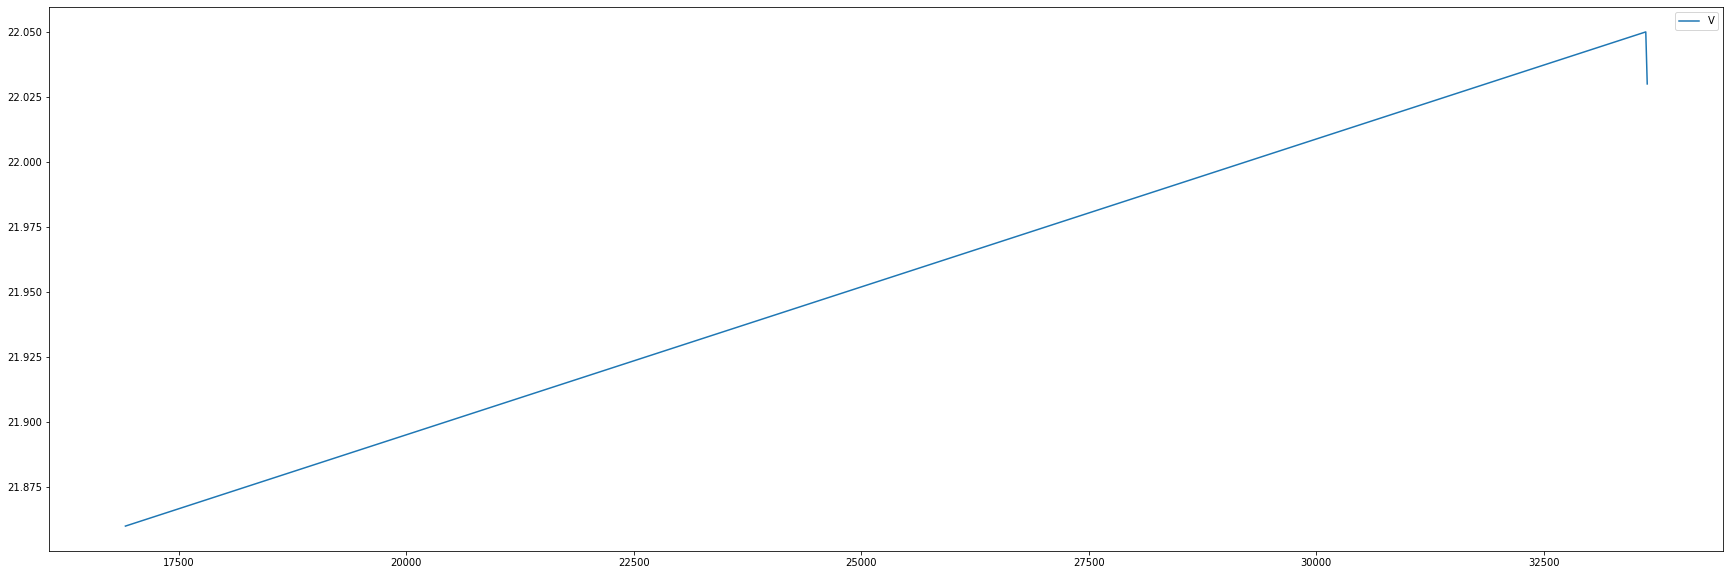

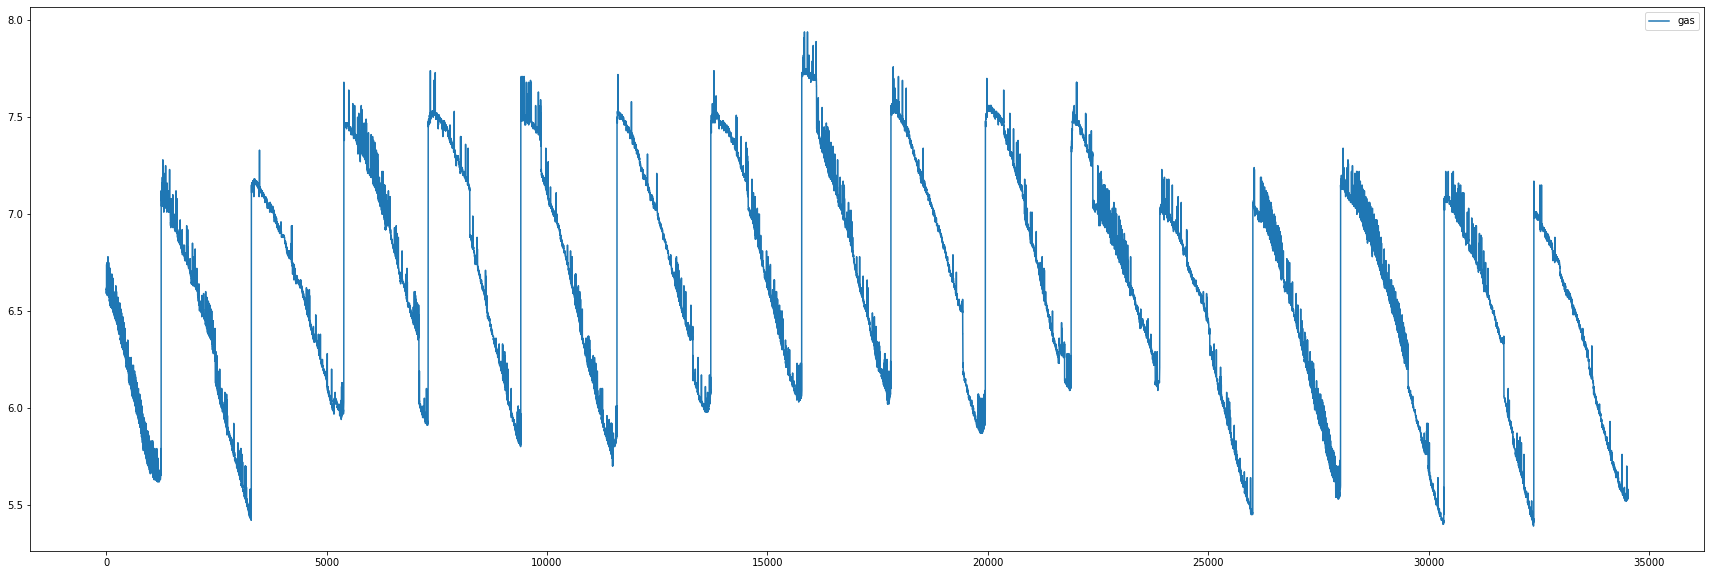

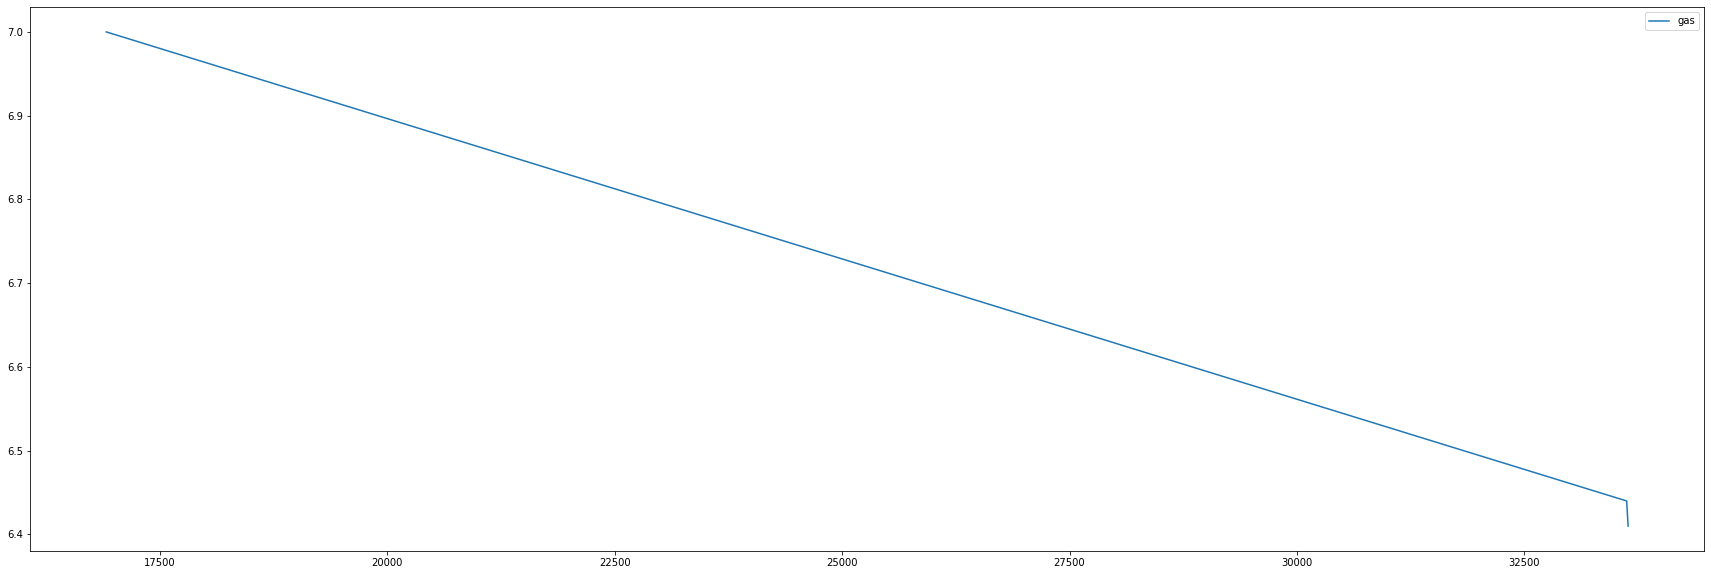

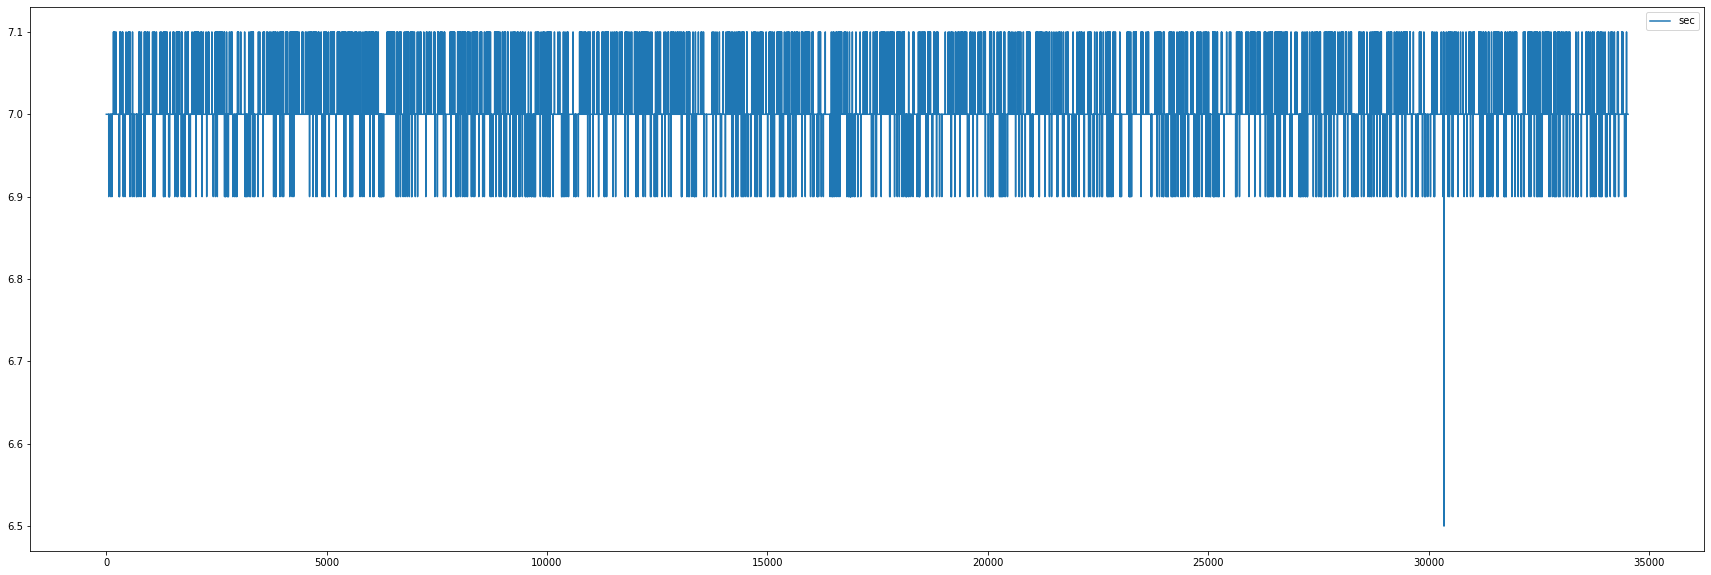

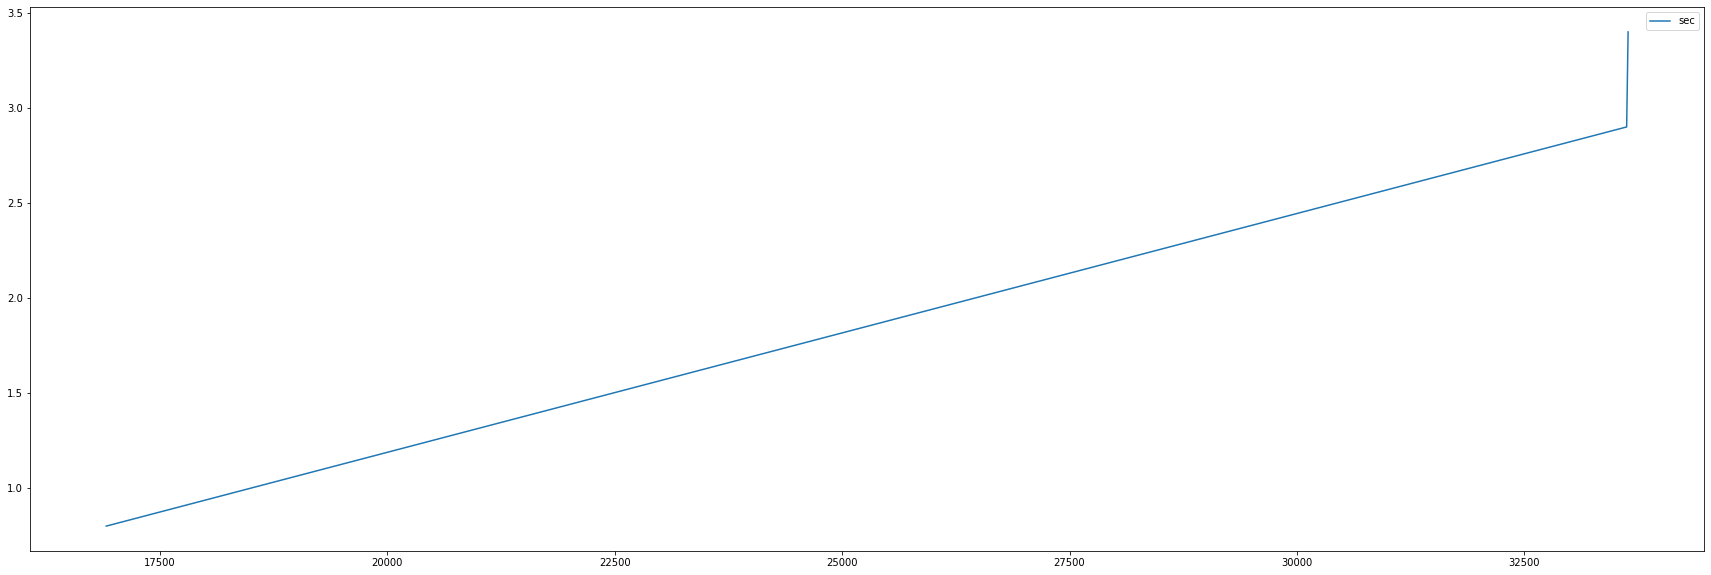

In [8]:
for j in range(len(var_list)) :
  plot_sensor(machine_decision_data_good[1],f'{var_list[j]}')
  plot_sensor(machine_decision_data_bad[1],f'{var_list[j]}')

# 2호기 프로세스 2

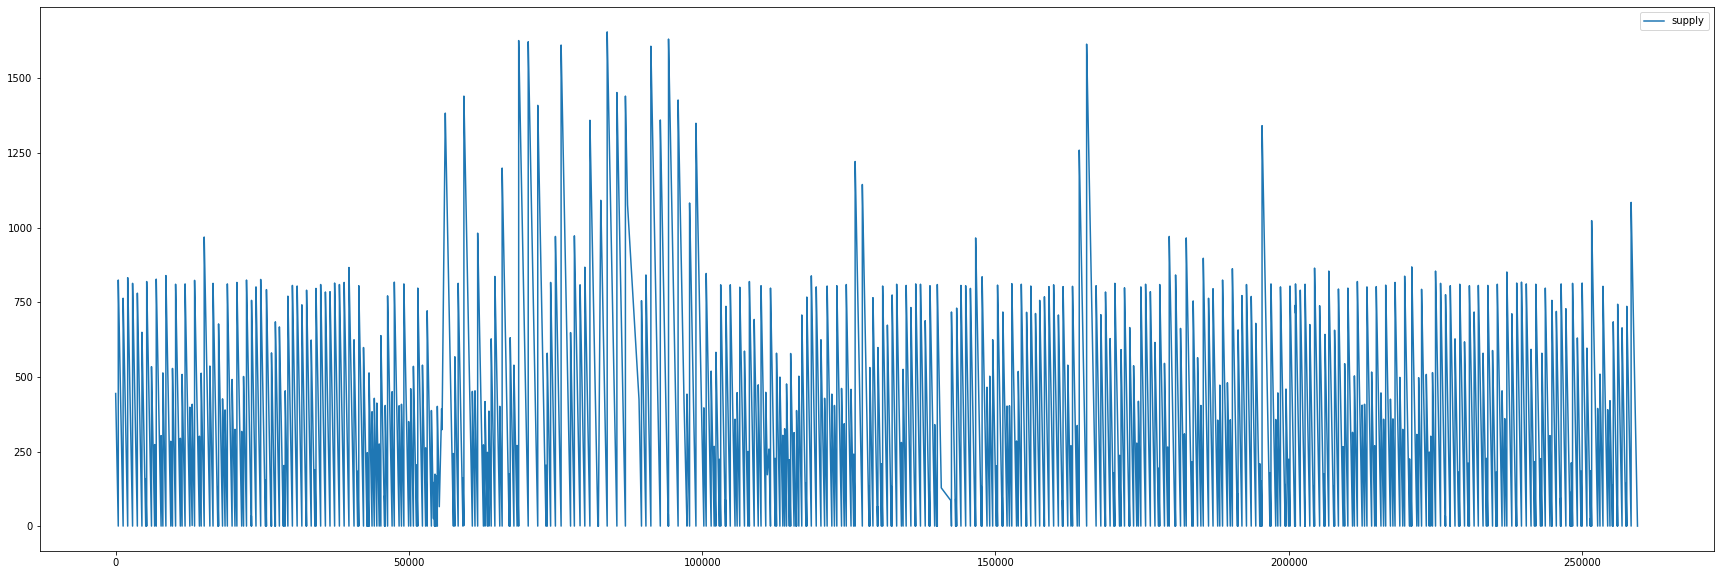

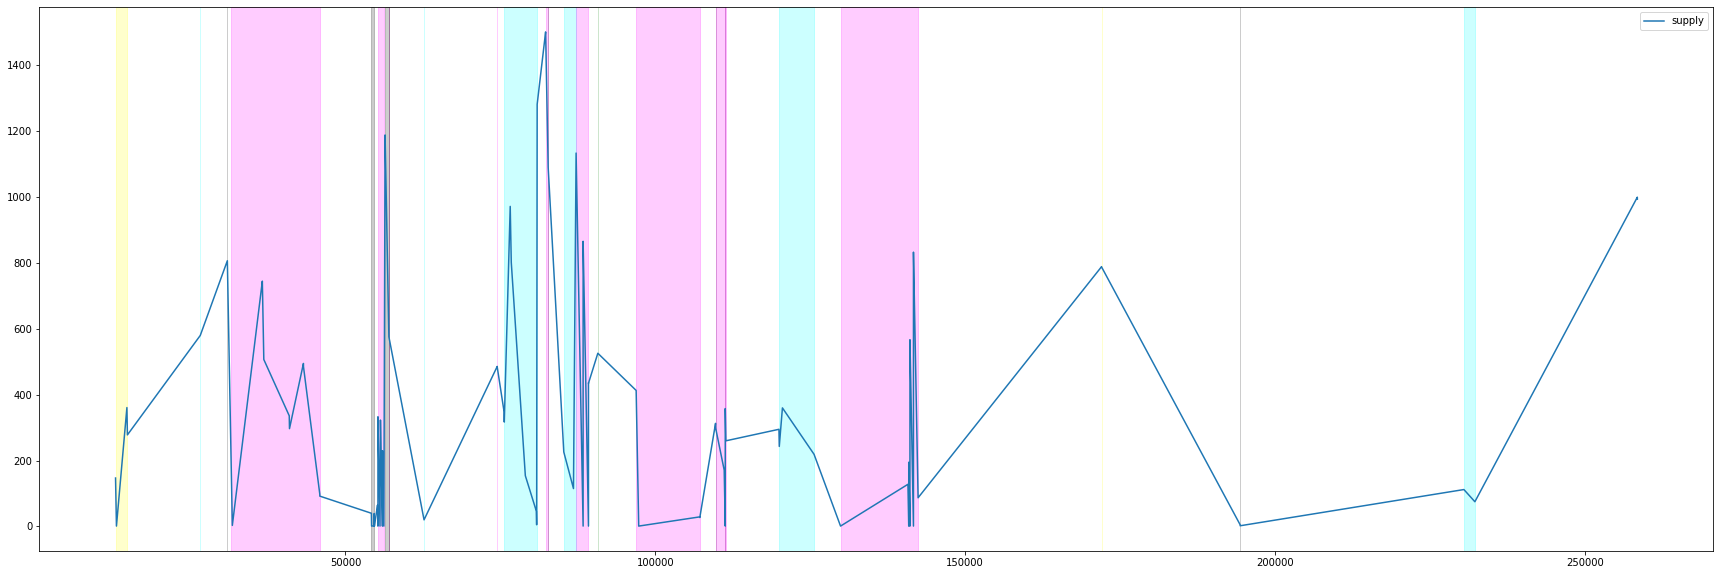

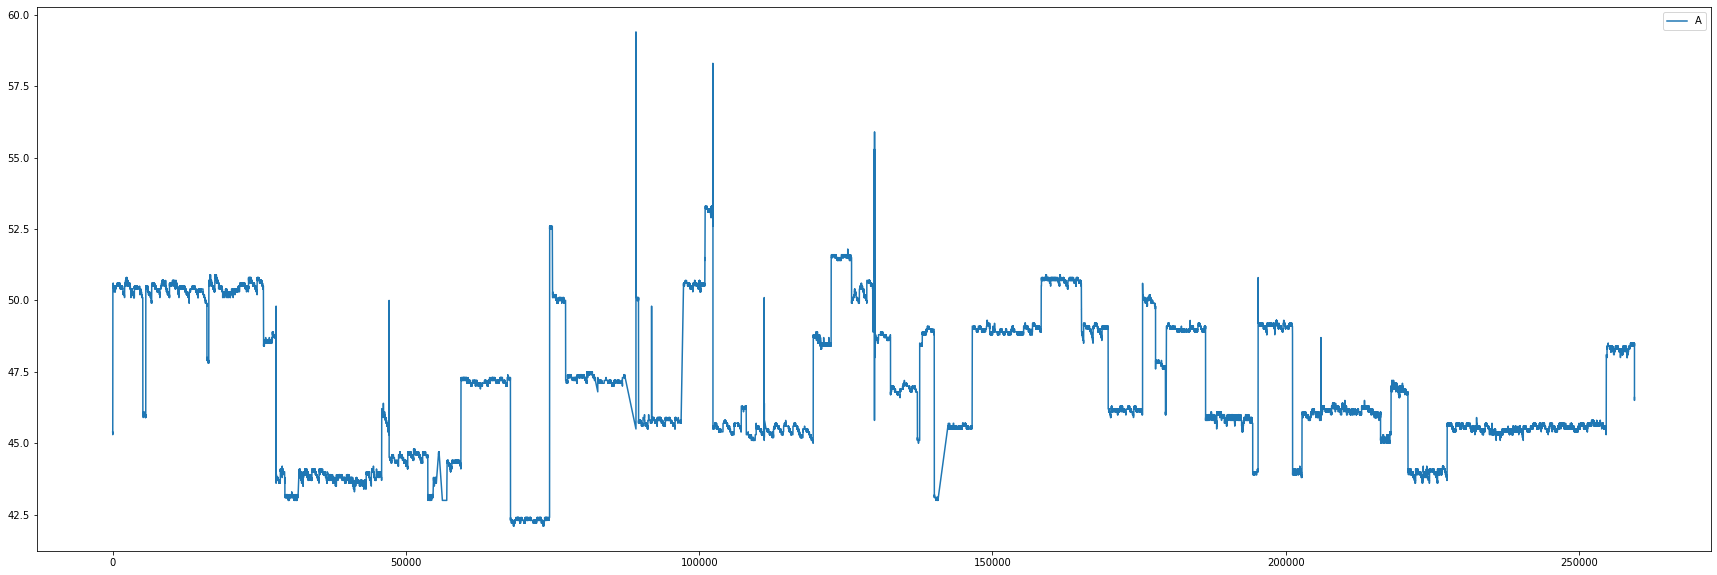

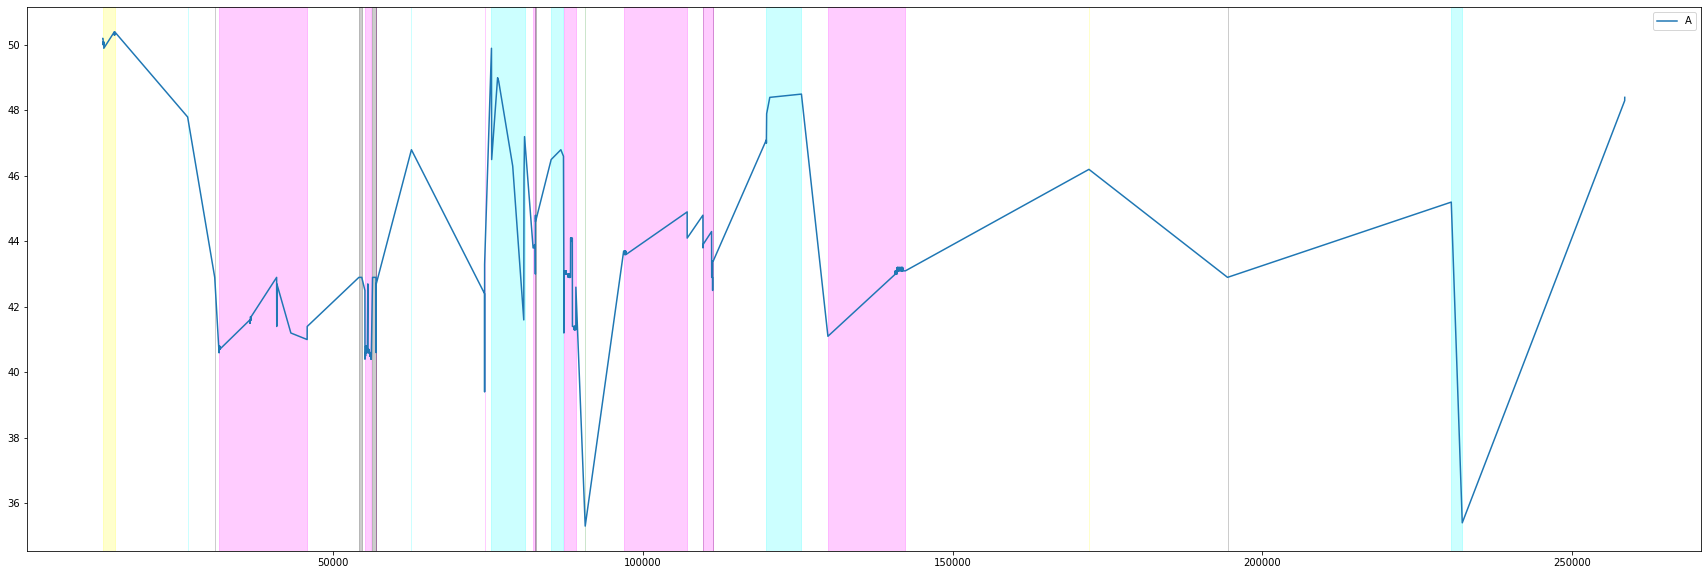

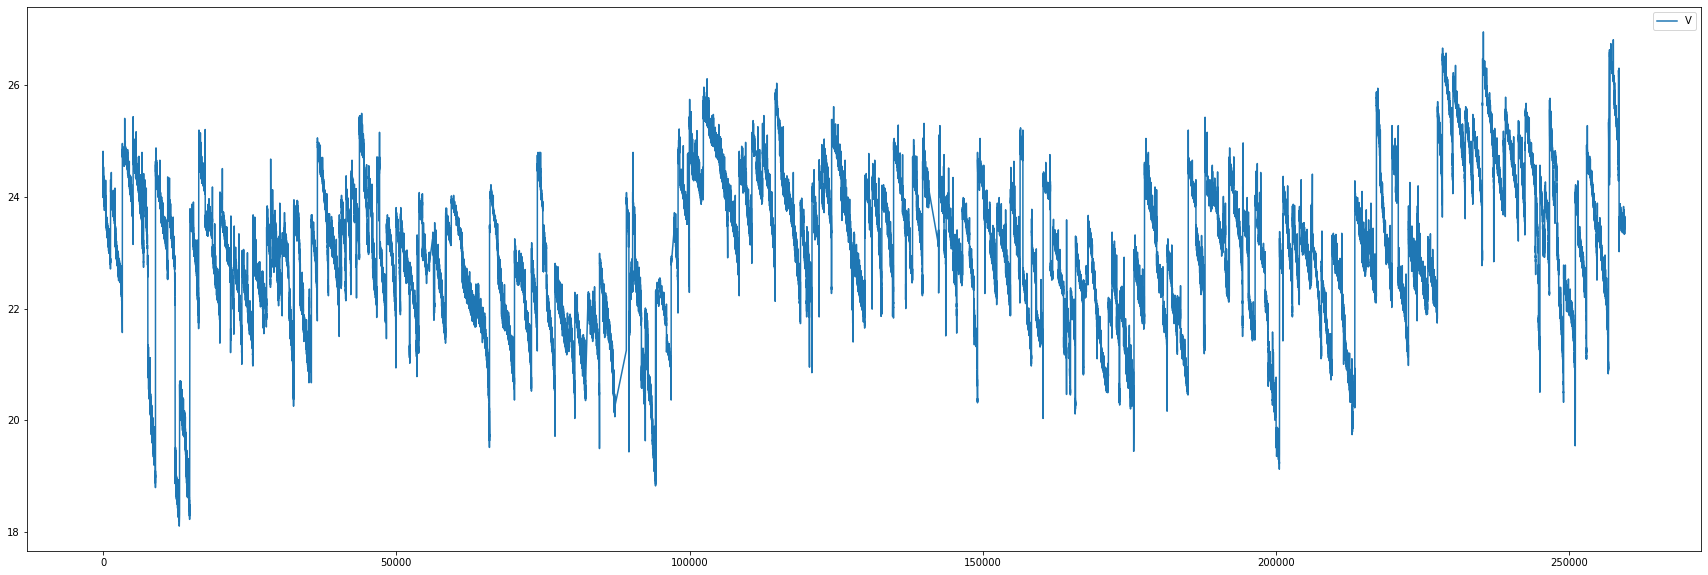

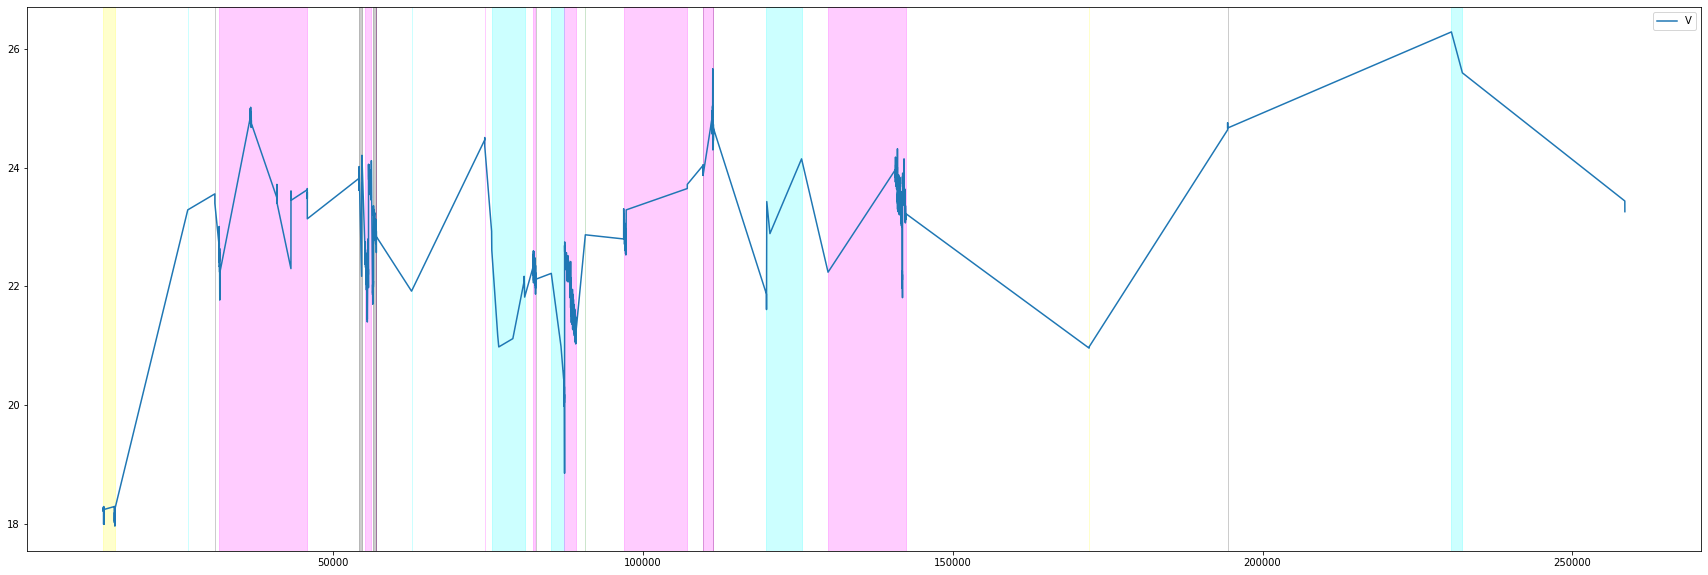

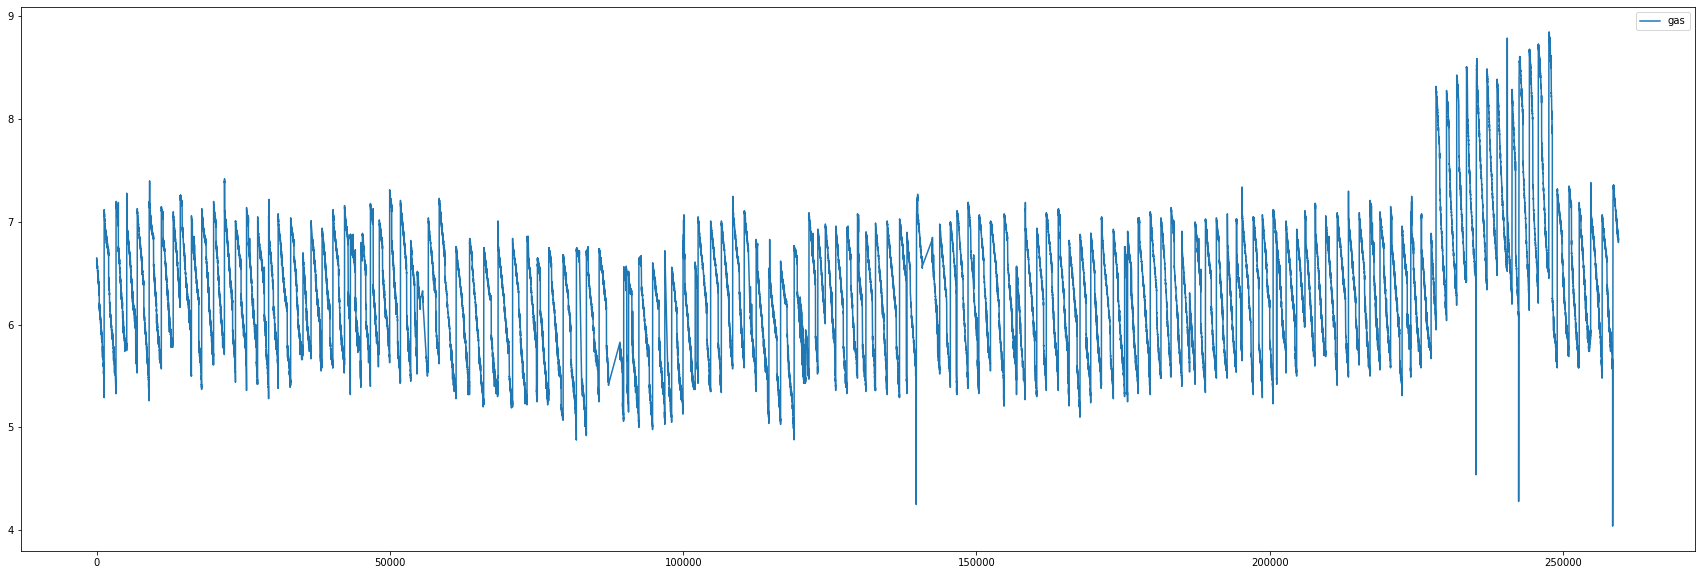

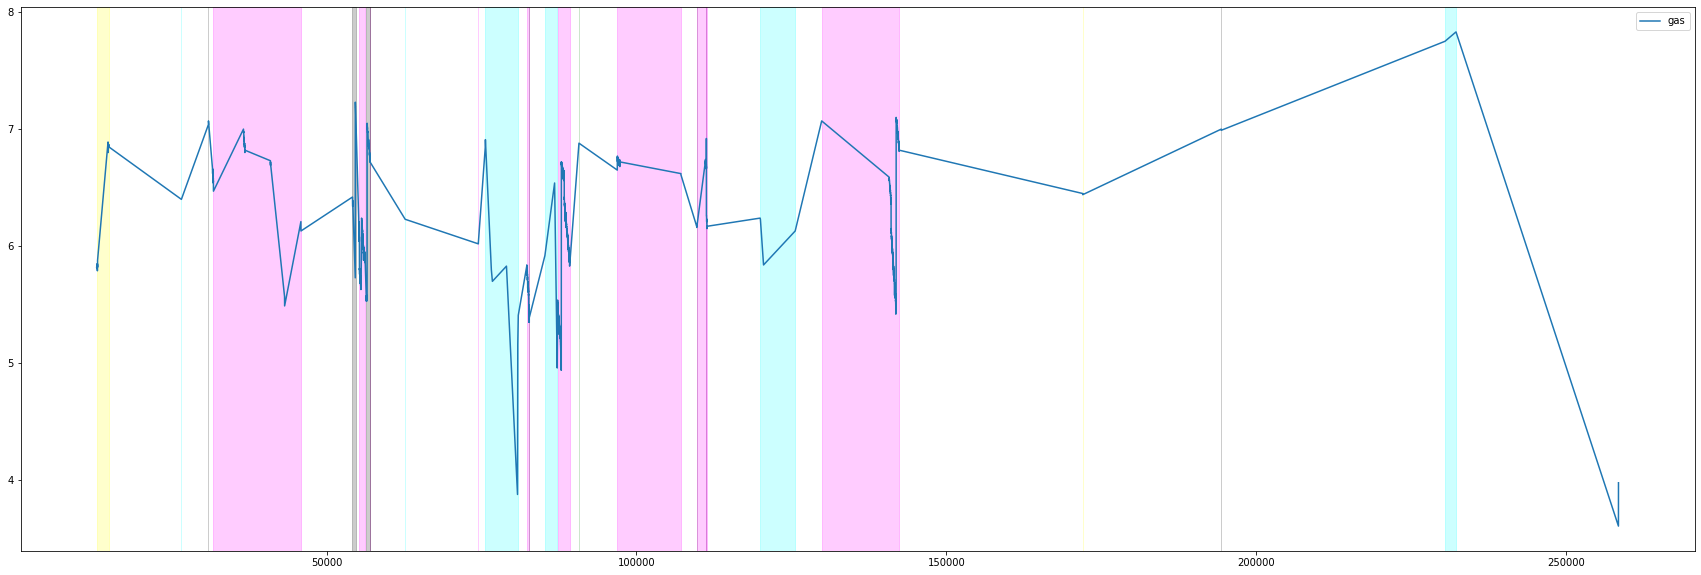

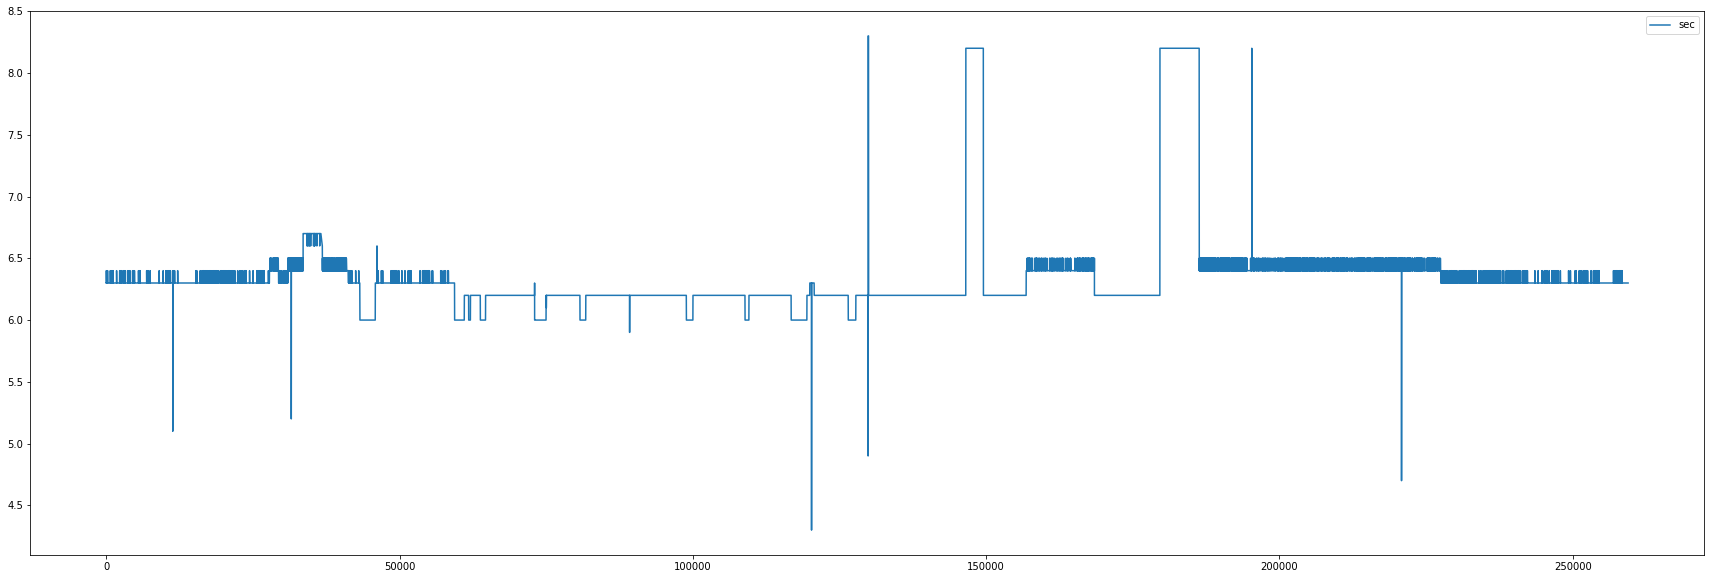

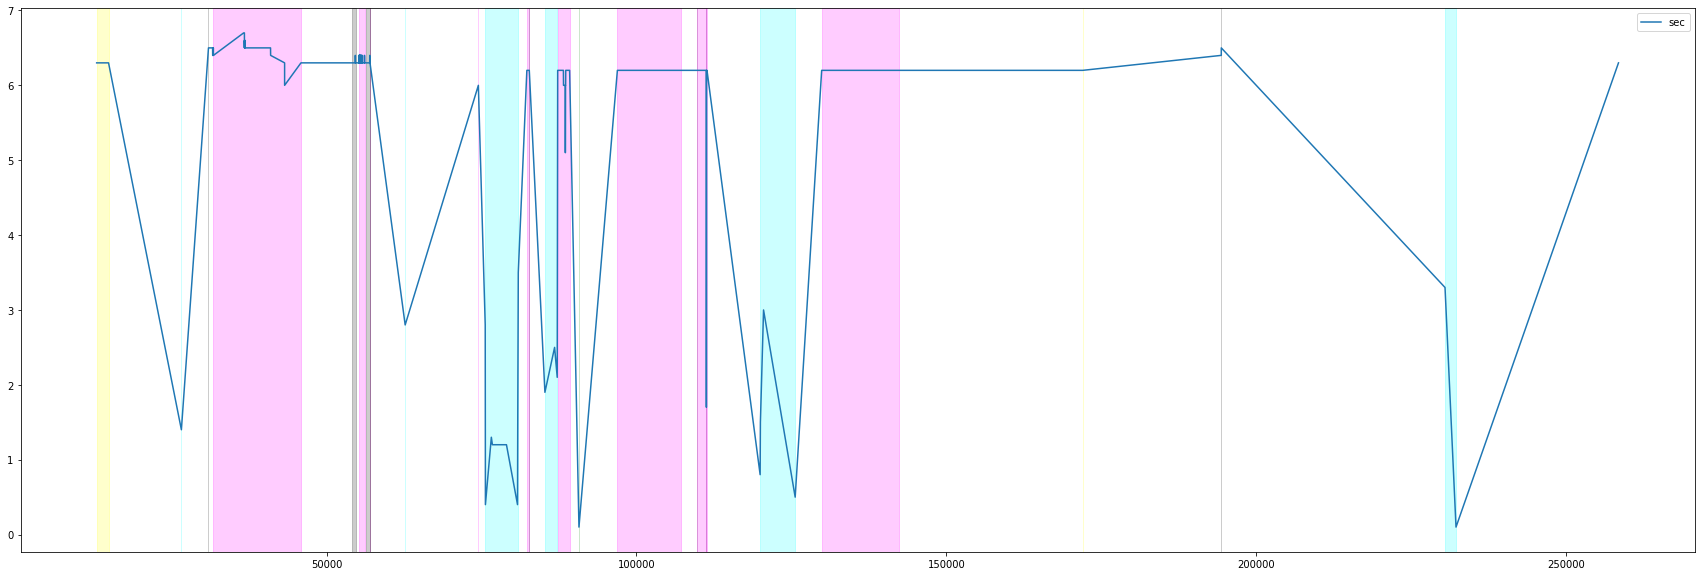

In [9]:
for j in range(len(var_list)) :
  plot_sensor(machine_decision_data_good[2],f'{var_list[j]}')
  plot_sensor(machine_decision_data_bad[2],f'{var_list[j]}')

# 2호기 프로세스 3

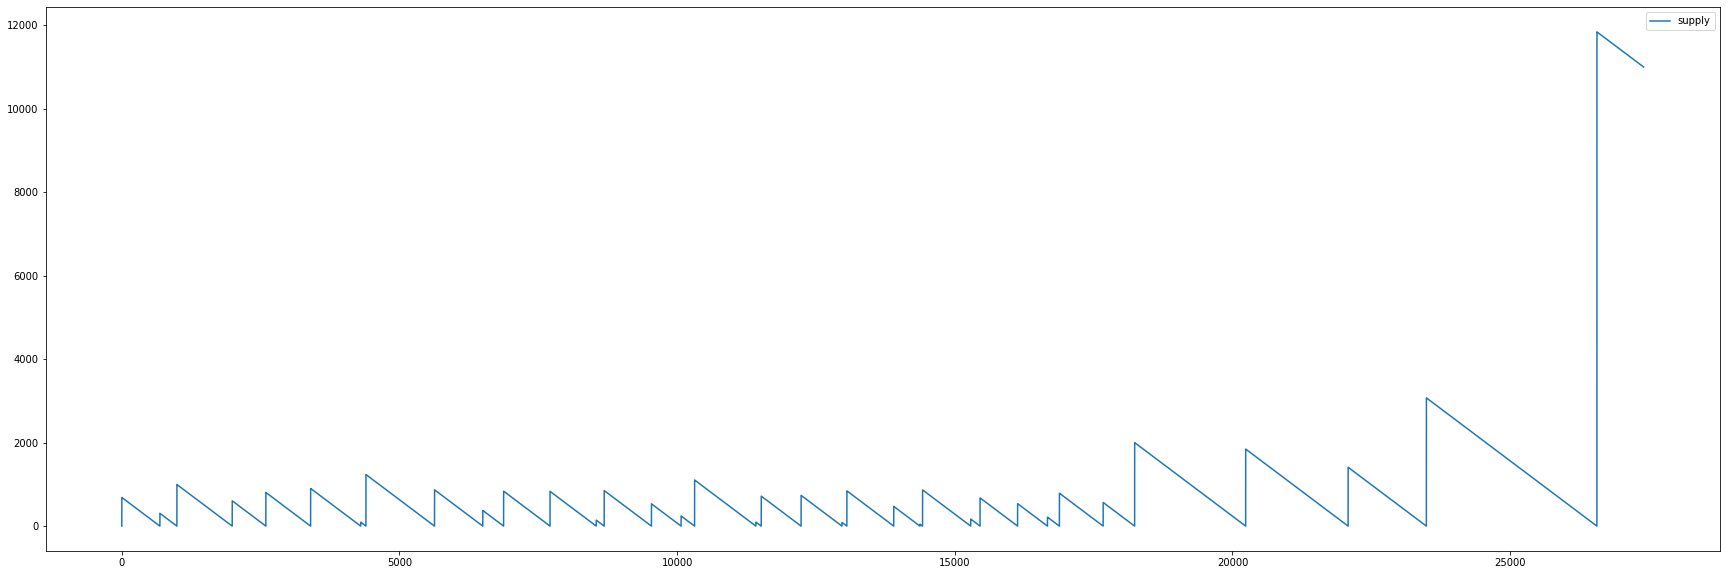

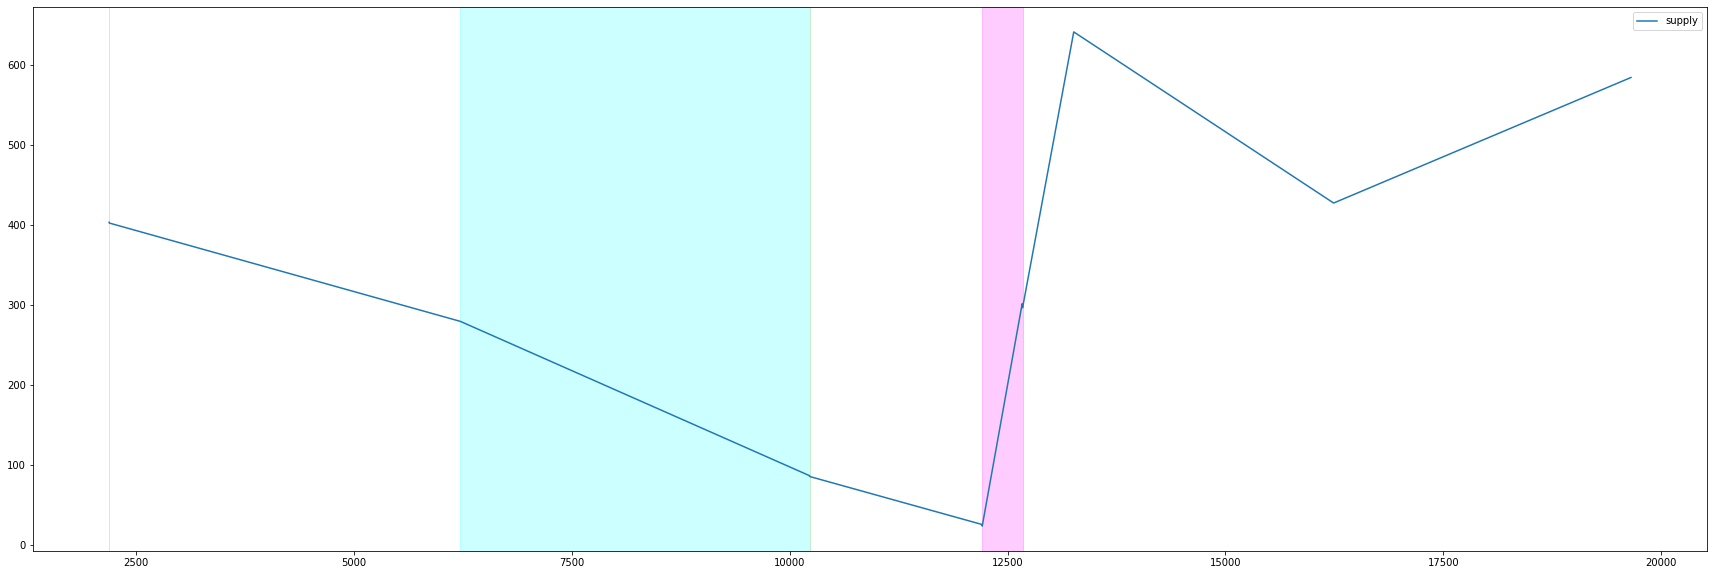

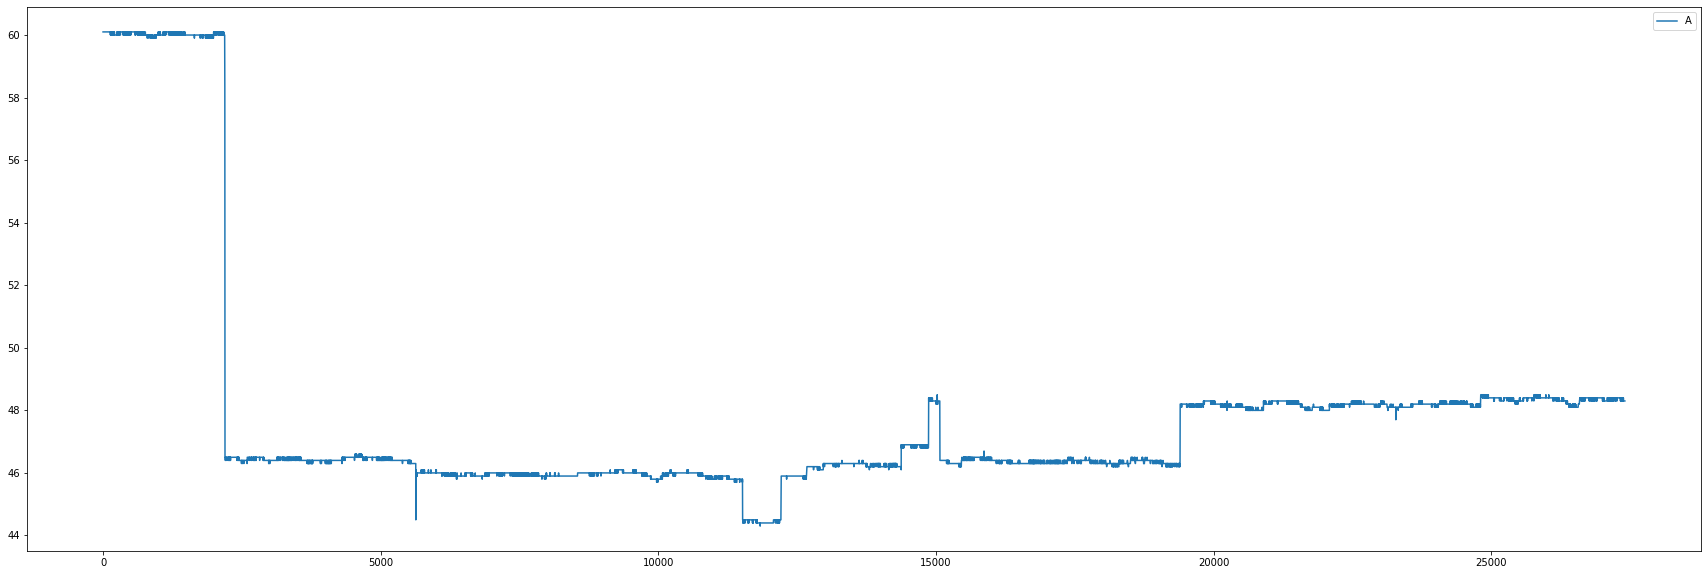

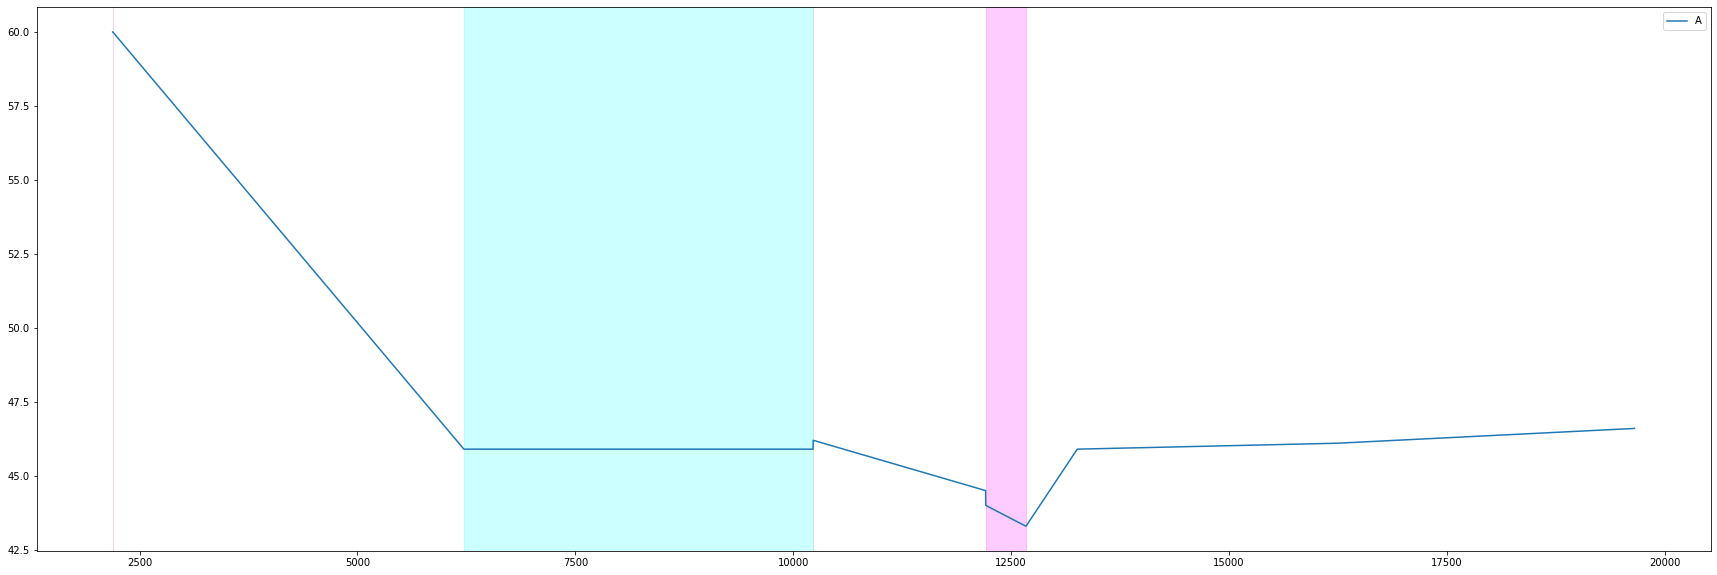

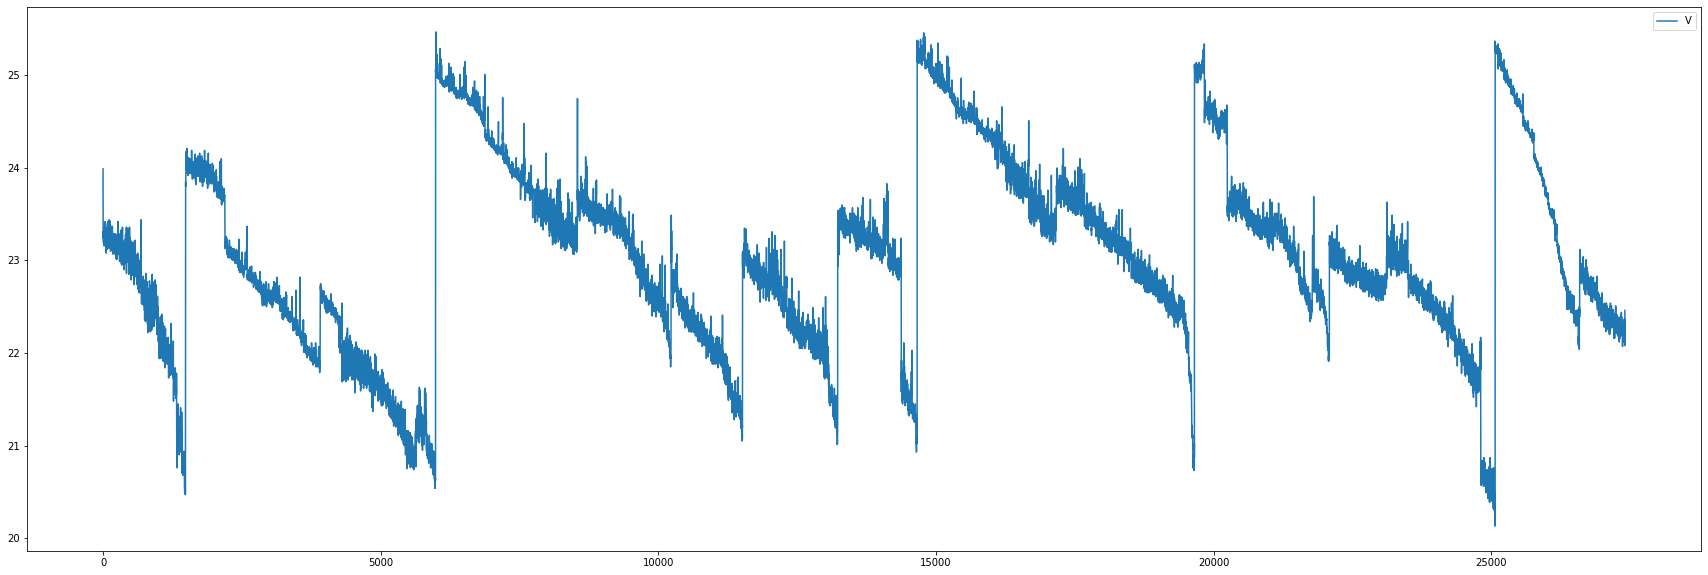

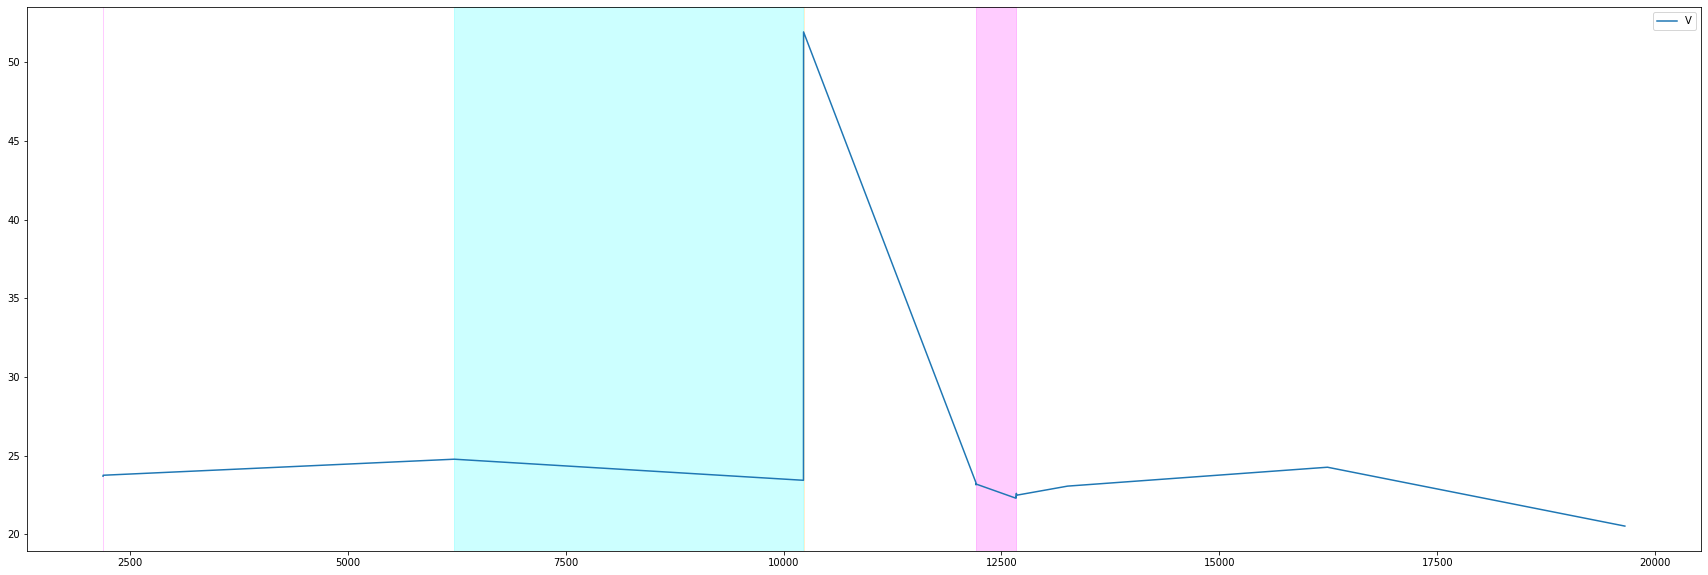

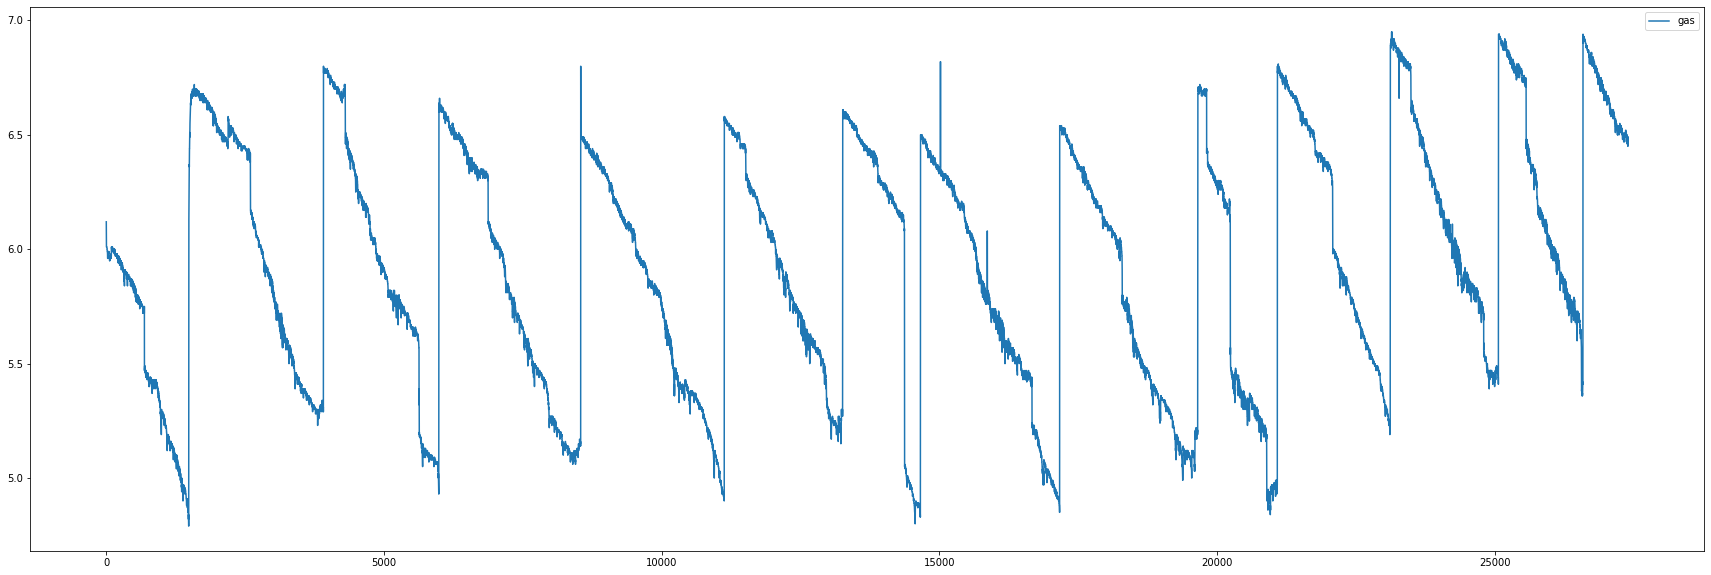

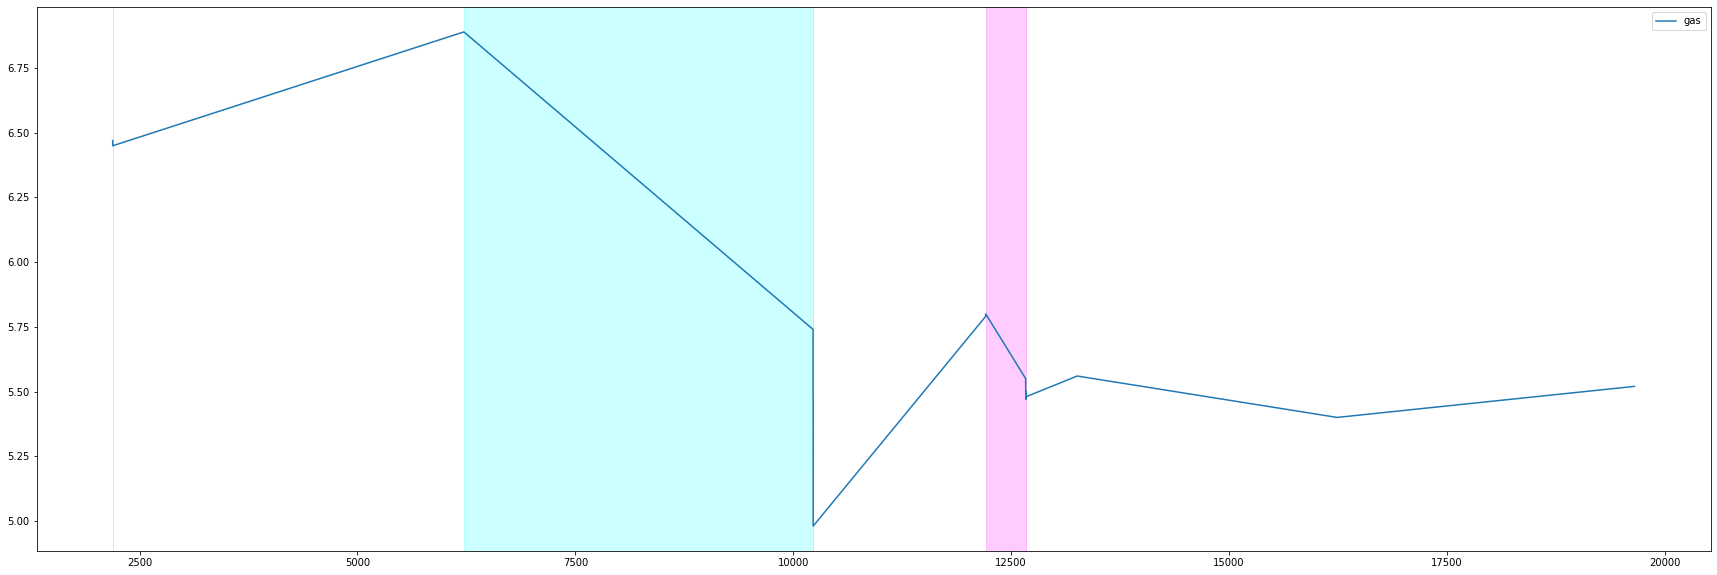

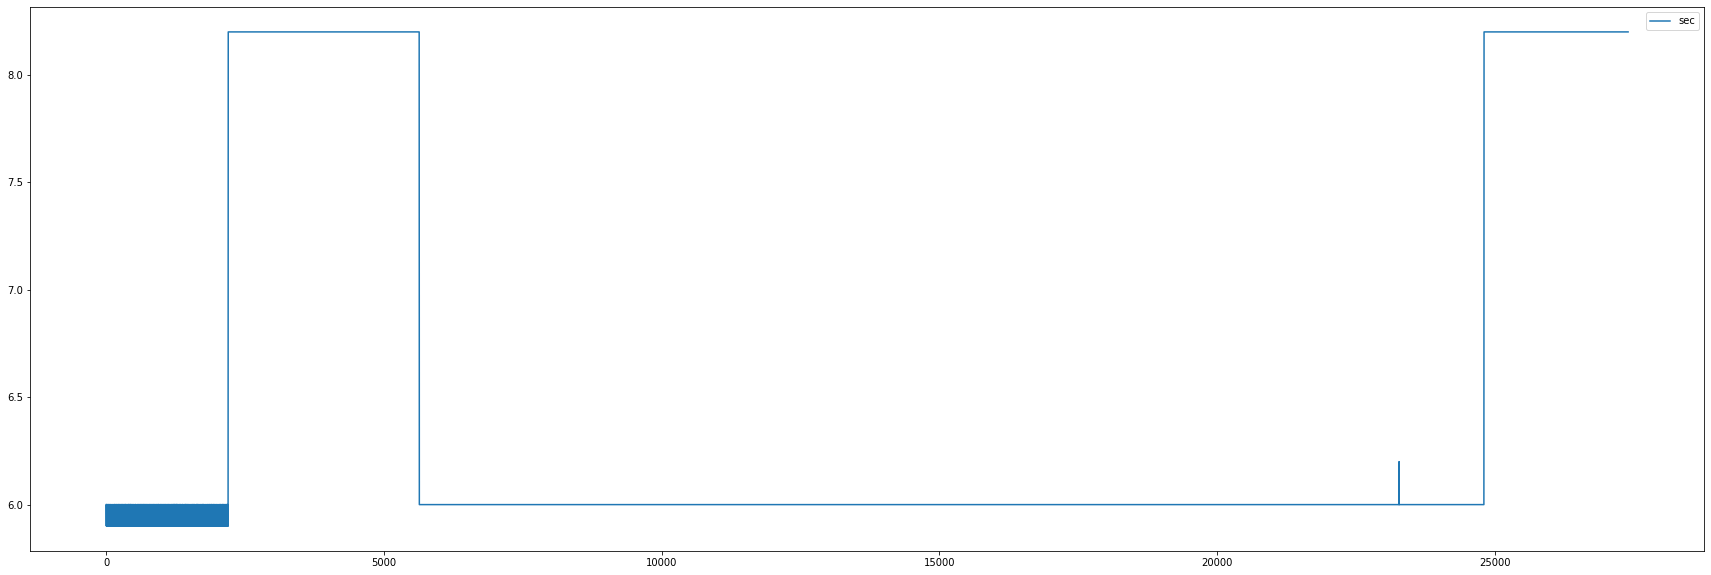

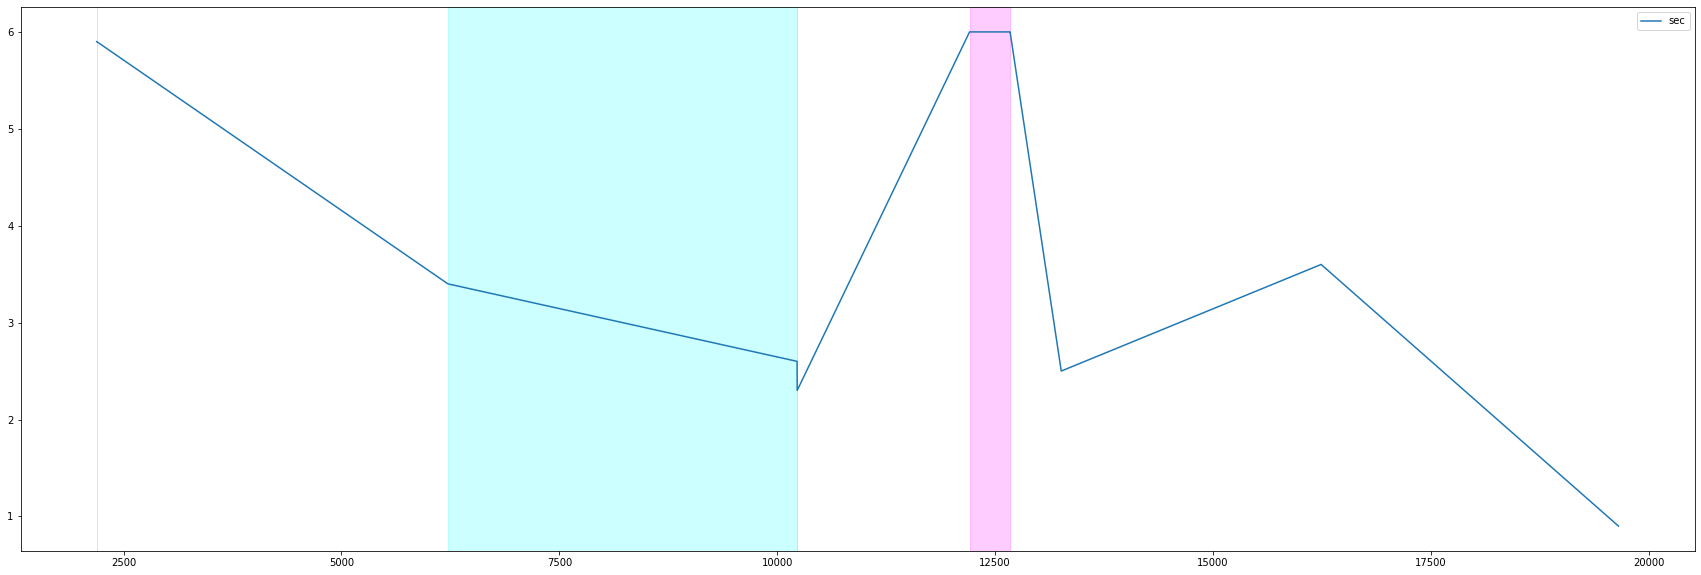

In [10]:
for j in range(len(var_list)) :
  plot_sensor(machine_decision_data_good[3],f'{var_list[j]}')
  plot_sensor(machine_decision_data_bad[3],f'{var_list[j]}')

# 2호기 프로세스 11

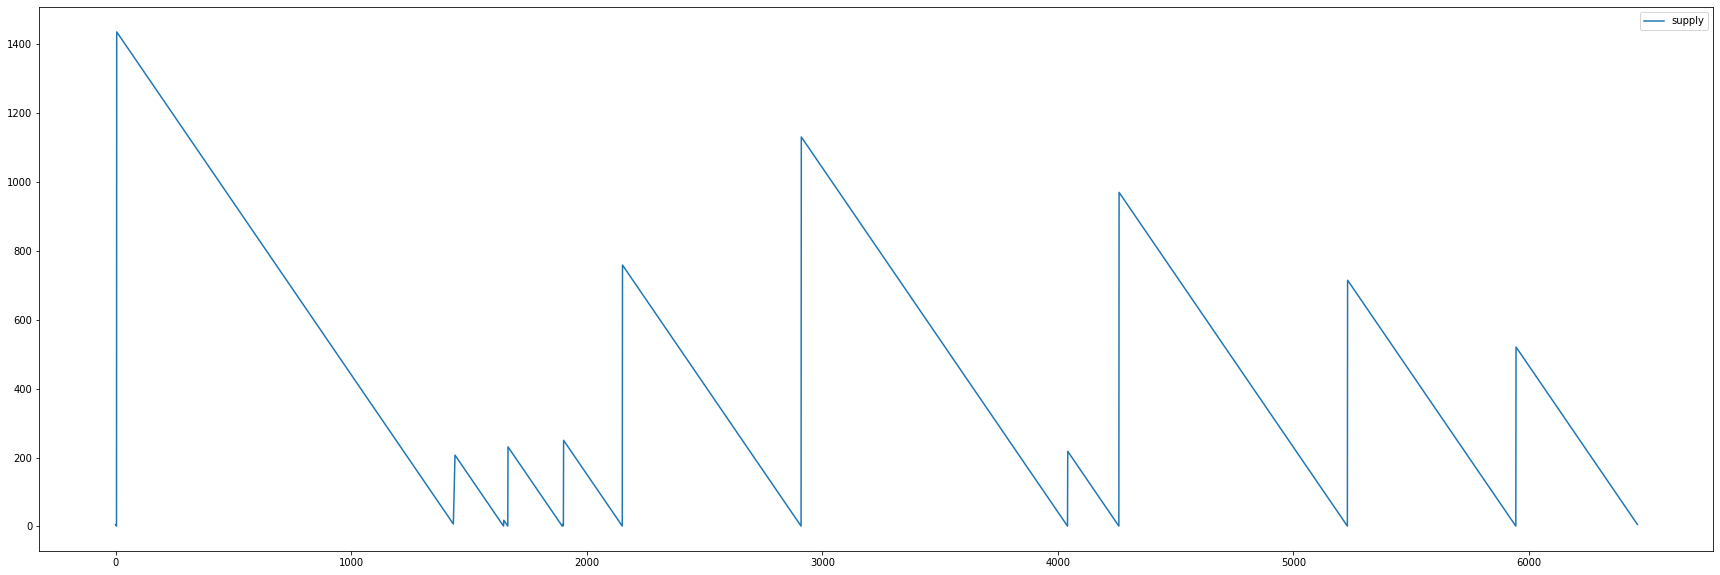

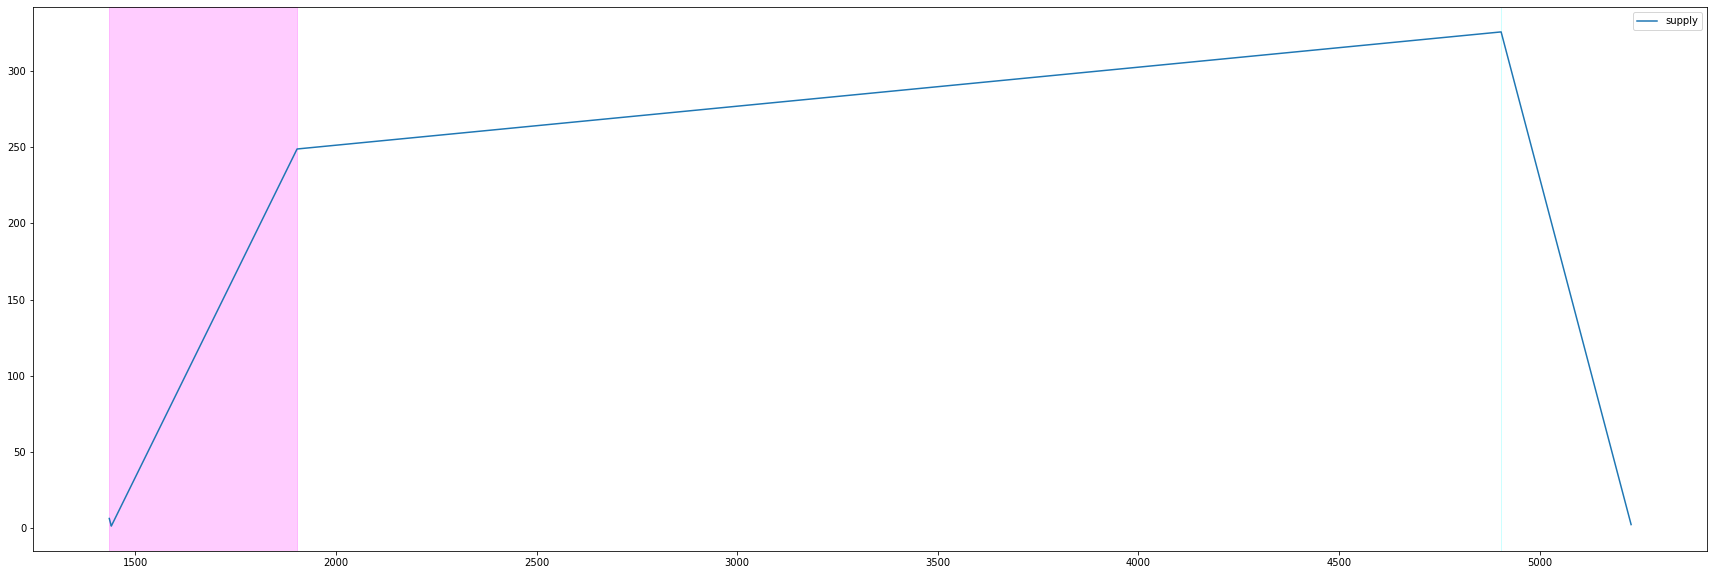

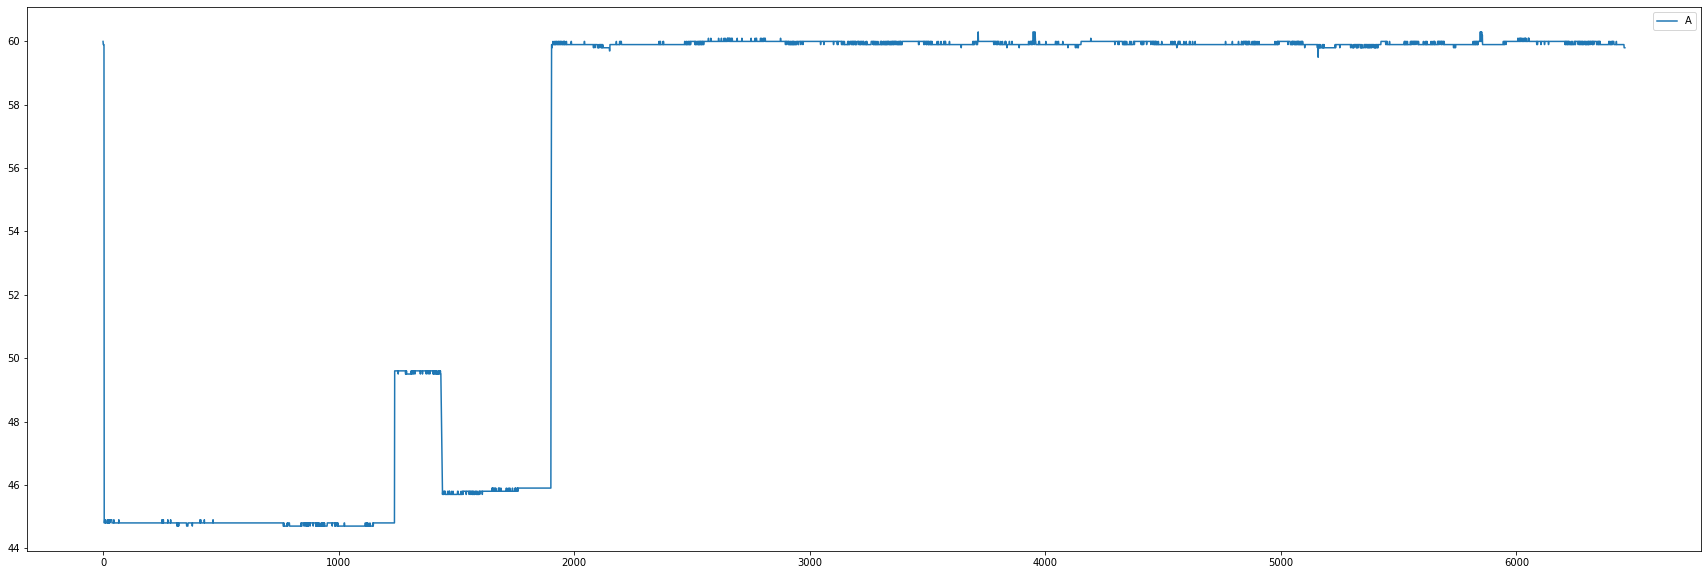

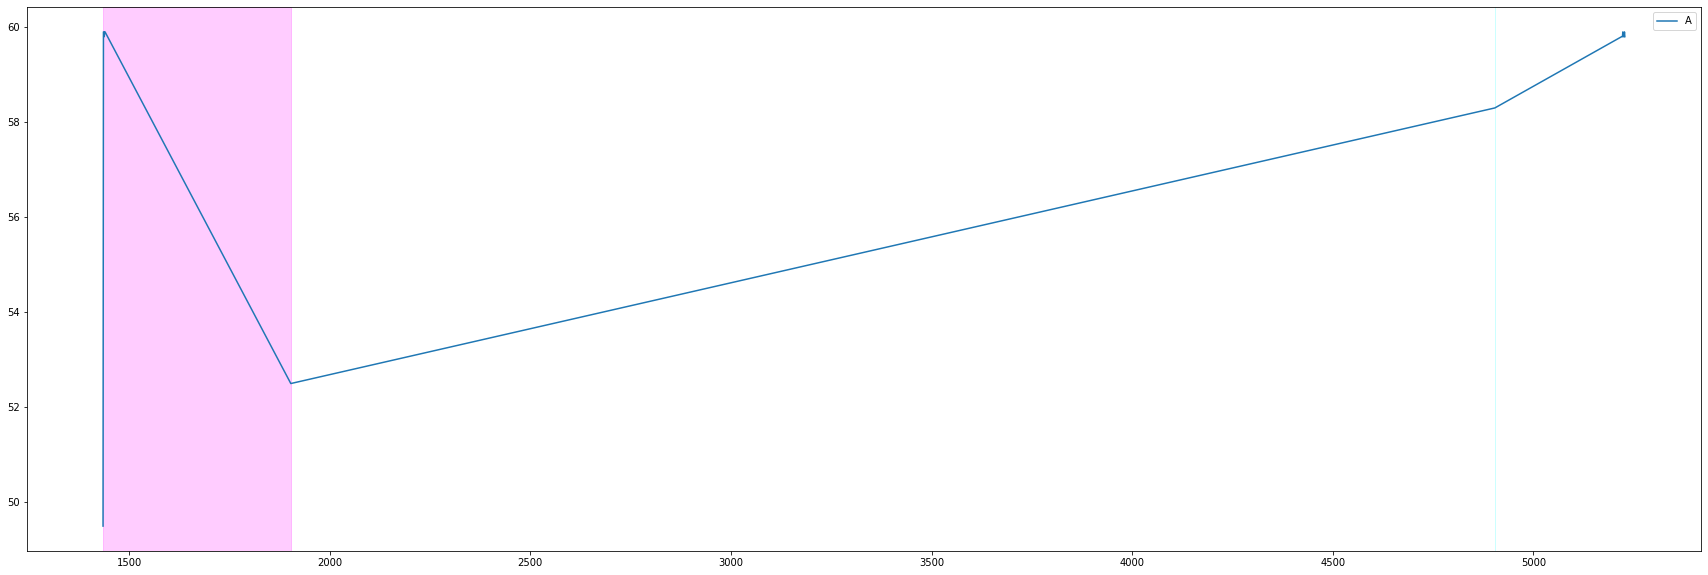

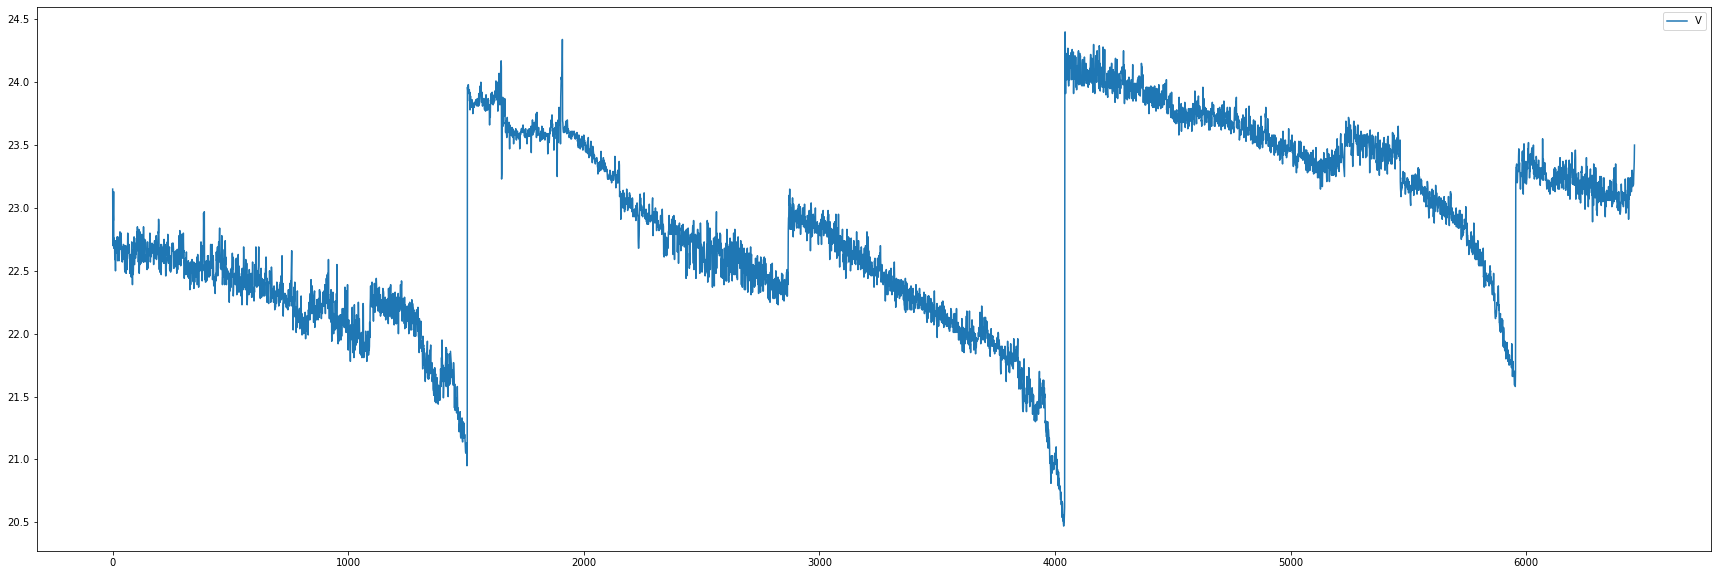

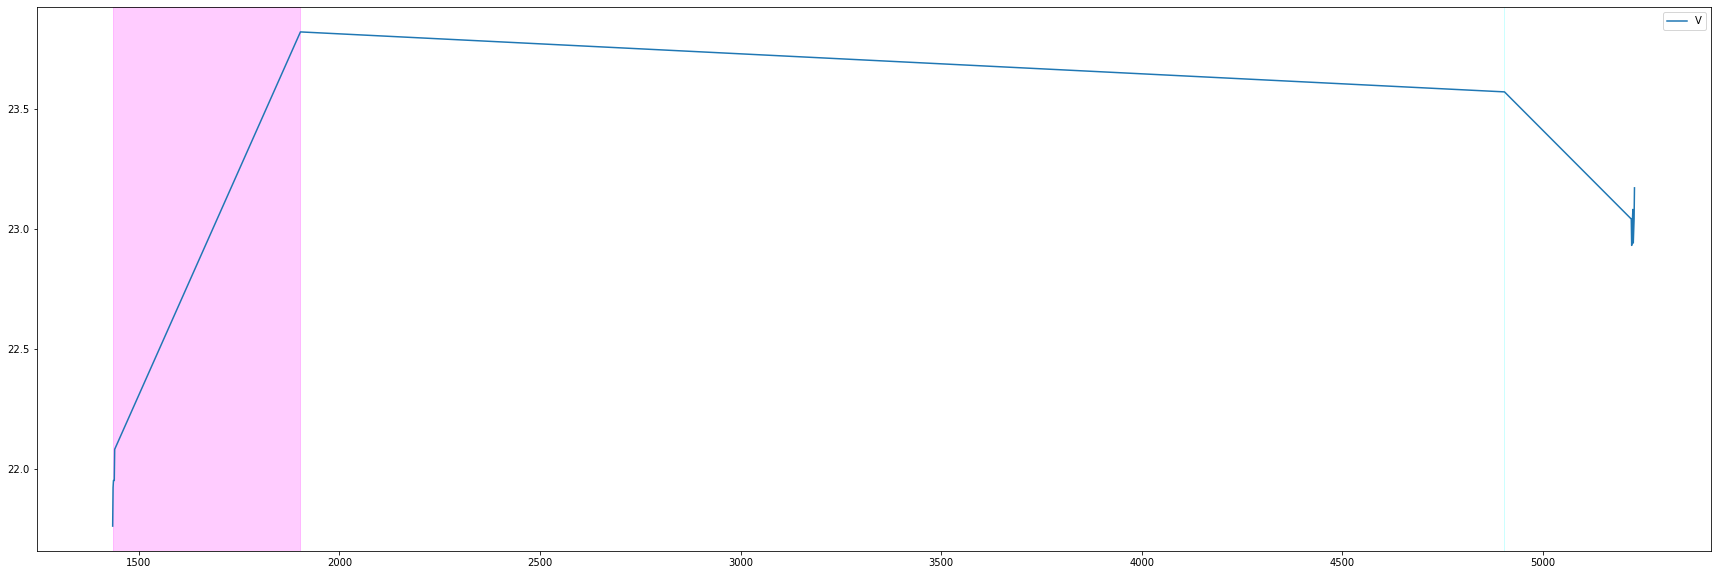

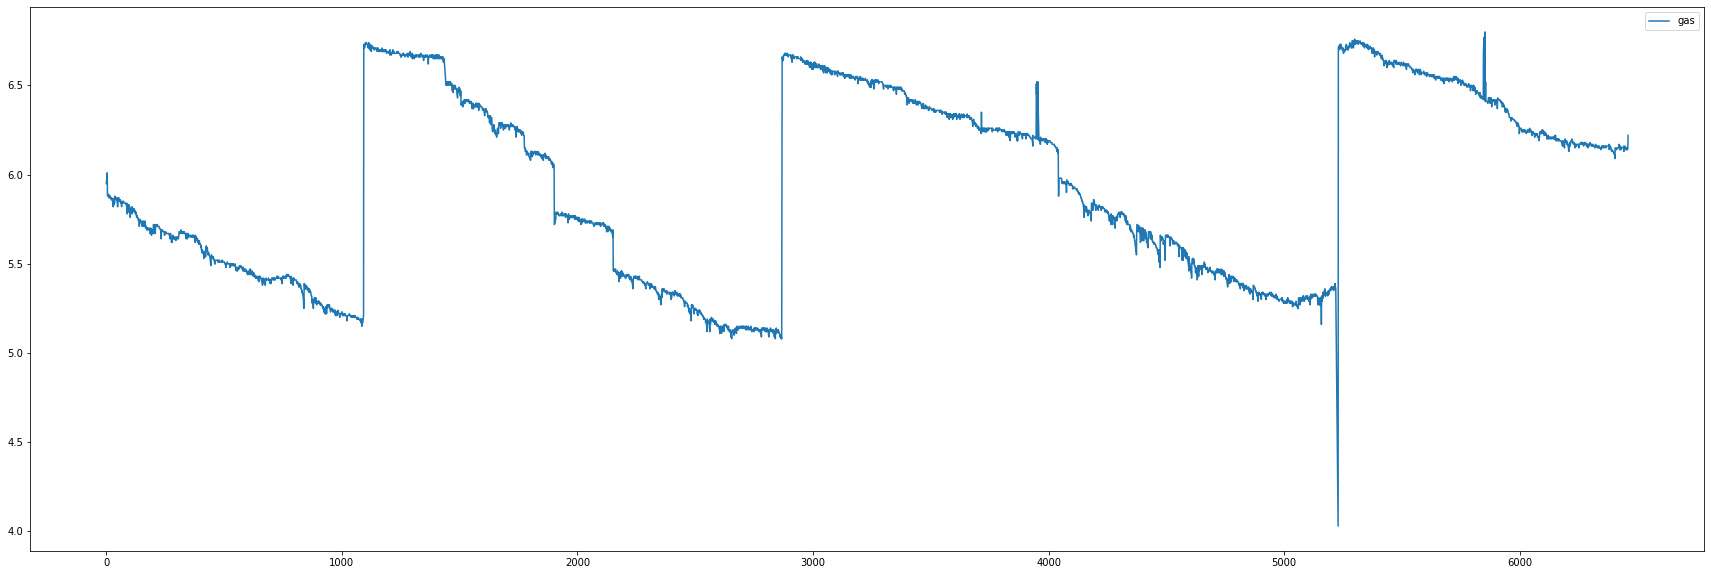

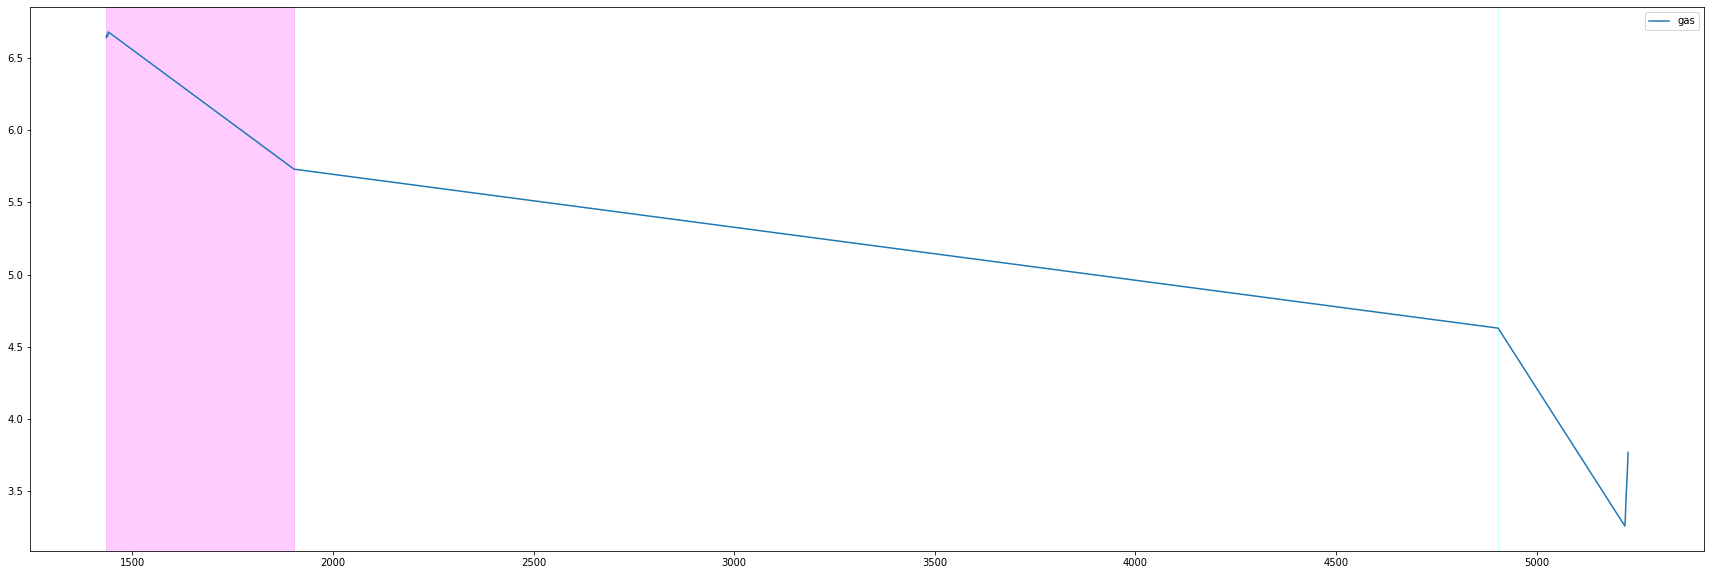

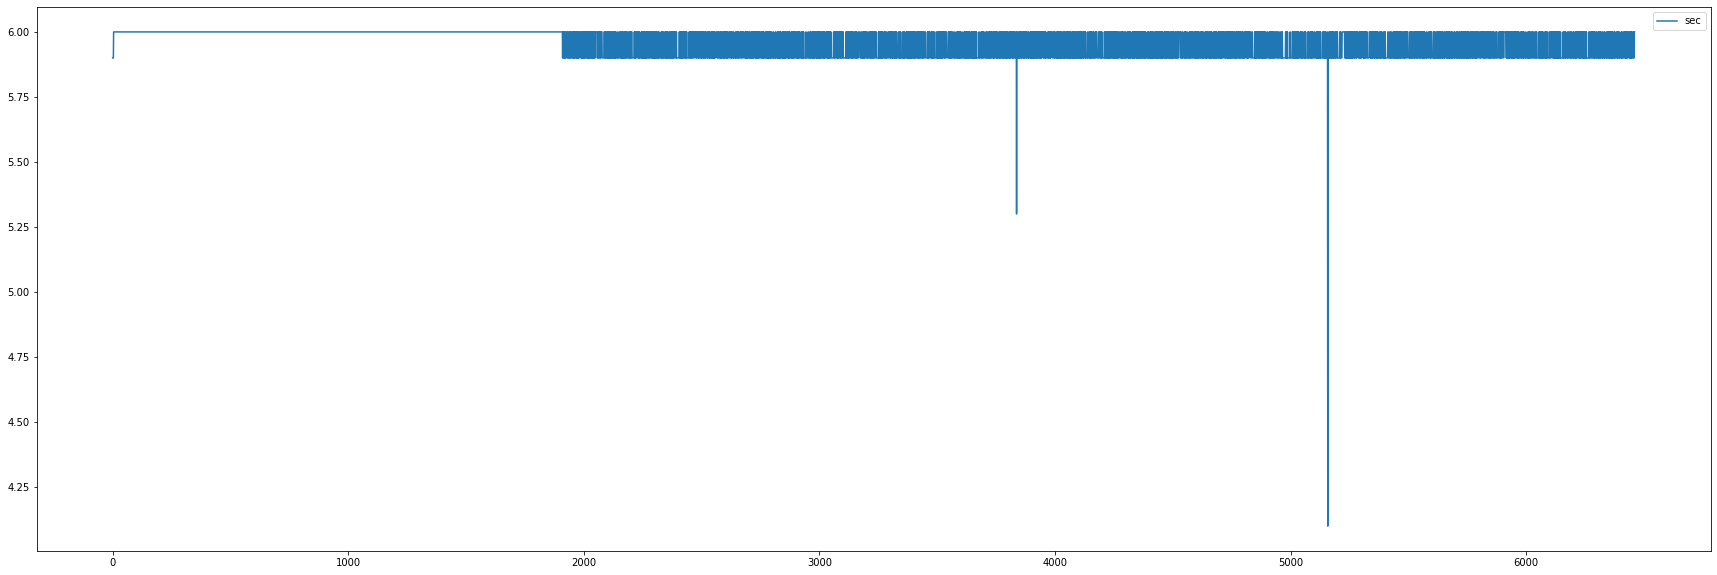

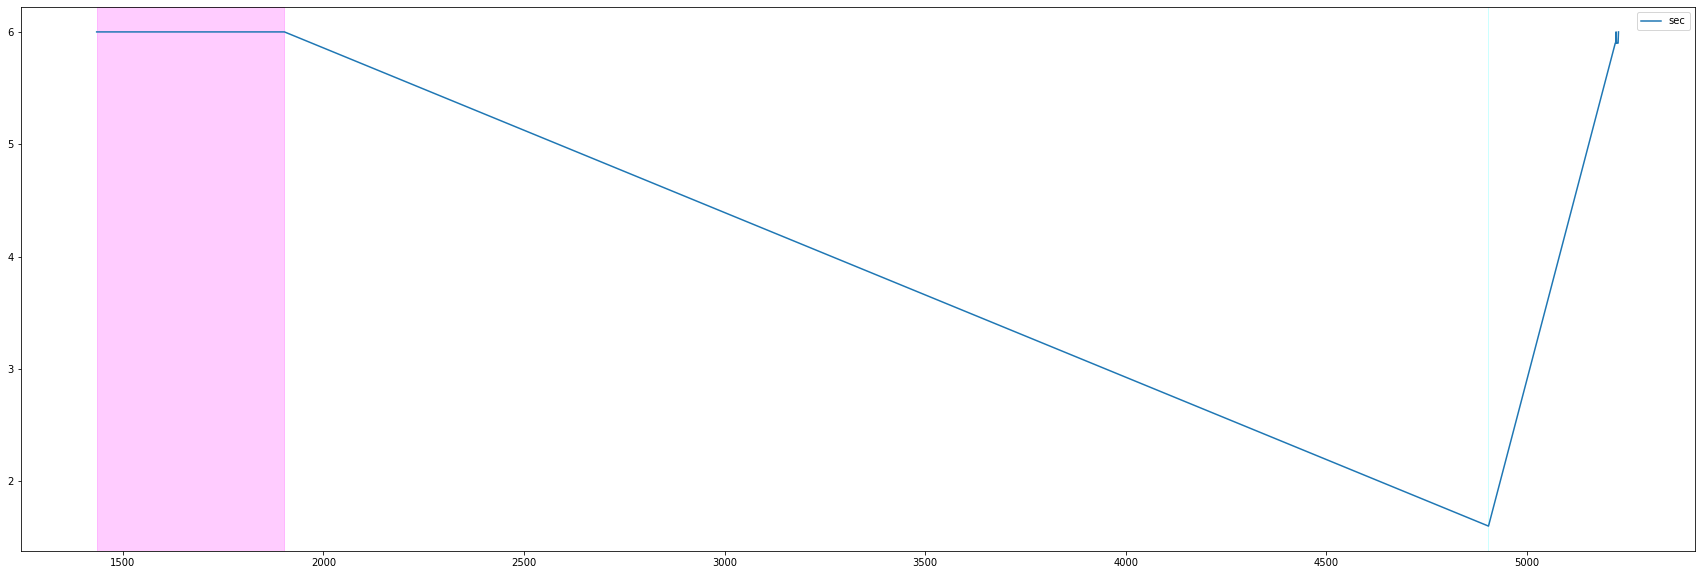

In [11]:
for j in range(len(var_list)) :
  plot_sensor(machine_decision_data_good[4],f'{var_list[j]}')
  plot_sensor(machine_decision_data_bad[4],f'{var_list[j]}')